# IEEE-CIS Fraud Detection :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
transaction = pd.read_csv("/content/drive/My Drive/train_transaction.csv")
identity = pd.read_csv("/content/drive/My Drive/train_identity.csv")

print(transaction.shape)
print(identity.shape)

(590540, 394)
(144233, 41)


In [ ]:
transaction.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
identity.head(2)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device


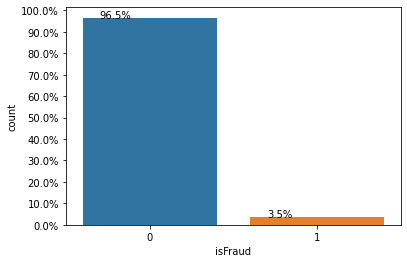

In [ ]:
total = int(transaction.shape[0])
ax=sns.countplot(x="isFraud", data=transaction)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))
 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

This shows that dataset is highly unbalanced

In [ ]:
test_transaction = pd.read_csv("/content/drive/My Drive/test_transaction.csv")
test_identity = pd.read_csv("/content/drive/My Drive/test_identity.csv")

In [ ]:
test_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = pd.merge(transaction, identity, on="TransactionID", how="left")
print(data.shape)
data.head(3)

(590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
del transaction, identity
data.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [ ]:
data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,140978.000000,127320.000000,80044.000000,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,231.855423,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215,94.347568,169.563231,28.343348,140.002441,42.335965,69.805717,41.638950,146.058108,0.561057,123.982137,146.621465,54.037533,17.901295,57.724444,...,13.103775,9.184612,0.058494,0.851040,0.296633,0.336790,1.312844,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,99.745325,48.053071,-344.507146,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,371.872026,529.053494,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262,157.660387,177.315865,62.384721,191.096774,89.000144,143.669253,99.743264,231.663840,0.316880,182.615225,186.042622,124.274558,67.614425,136.312450,...,106.739813,73.627893,0.304415,3.950295,1.364356,1.580144,8.769083,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,1.127602,11.774858,93.695502,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-122.000000,0.000000,-83.000000,0.000000,0.000000,0.000000,0.000000,-53.000000,-83.000000,0.000000,-193.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,90.000000,10.000000,-660.000000,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+0

In [ ]:
test_data = pd.merge(test_transaction, test_identity, on="TransactionID", how="left")
del test_transaction, test_identity
test_data.head(2)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# https://www.kaggle.com/kabure/almost-complete-feature-engineering-ieee-data
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
data = reduce_mem_usage(data)
test_data = reduce_mem_usage(test_data)

Mem. usage decreased to 650.48 Mb (66.8% reduction)
Mem. usage decreased to 565.37 Mb (66.3% reduction)


## **Analysis of TransactionDT feature :**

In [ ]:
print(data["TransactionDT"].isnull().sum())
print(test_data["TransactionDT"].isnull().sum())

0
0


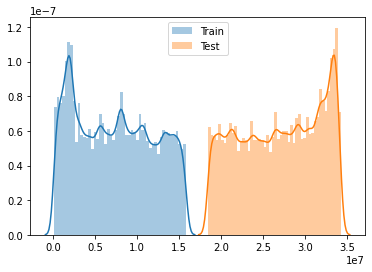

In [ ]:
sns.distplot(data["TransactionDT"].values, label="Train")
sns.distplot(test_data["TransactionDT"].values, label="Test")
plt.legend()
plt.show()

**Test transaction came after all the train transaction happened.**

In [ ]:
data['day'] = data['TransactionDT']//(3600*24)%7

In [ ]:
data["day"].value_counts()

1    98502
0    86377
4    85433
6    85356
5    84815
2    79834
3    70223
Name: day, dtype: int64

In [ ]:
test_data['day'] = test_data['TransactionDT']//(3600*24)%7

<Figure size 864x432 with 0 Axes>

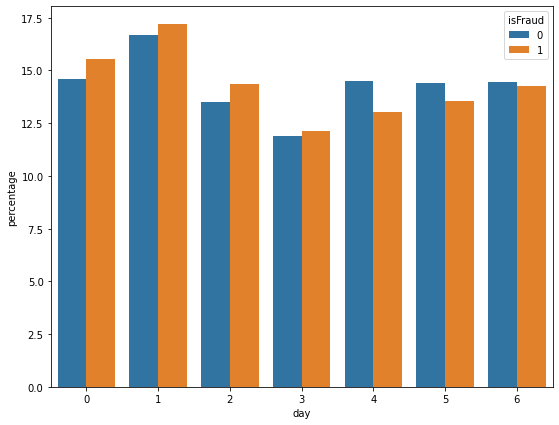

In [ ]:
plt.figure(figsize=(12,6))

hour = data.groupby(['isFraud'])['day'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('day')
plt.figure(figsize=(9,7))
sns.barplot(x="day", y="percentage", hue="isFraud", data=hour)

plt.show()

**days 0,1,2,3 has more fraud transactions**

it seems day is the important feature for classification hence number of transactions on that would be as important features.

In [ ]:
temp = data["day"].value_counts().to_dict()
data["transactionPrDay"] = data["day"].map(temp)
test_data["transactionPrDay"] = test_data["day"].map(temp)

In [ ]:
data["hour"] = (data["TransactionDT"]//(3600))%24
test_data["hour"] = (test_data["TransactionDT"]//(3600))%24

occurance of transcations in each hour of the day are similar in train and test data.

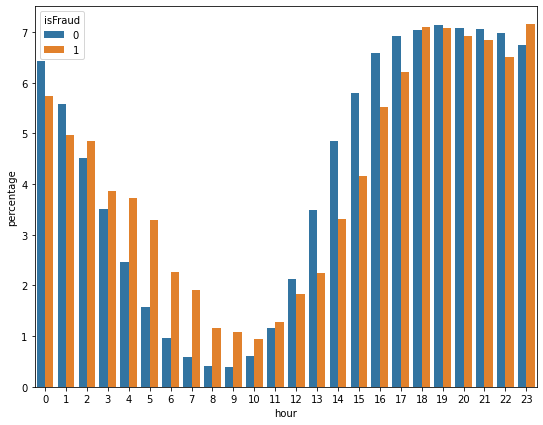

In [ ]:
hour = data.groupby(['isFraud'])['hour'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('hour')
plt.figure(figsize=(9,7))
sns.barplot(x="hour", y="percentage", hue="isFraud", data=hour)
plt.show()

It is observed that at hour 2,3,4,5,6,7,8,,9,10 and 23 there are much more fraudulent transactions happened than legit transaction that's why these hours will be in high alert.

In [ ]:
# this function will create new feature of categorical values shows alentness at various hours of day.
def hourFeature(hour):
    if hour>2 and hour <11:
        return "highalert"
    if hour ==11 or hour==18:
        return "lowalert"
    if hour==2 or hour==23:
        return "mediumalert"
    else:
        return "noalert"

data['Alert'] = data['hour'].apply(hourFeature)
test_data["Alert"] = test_data["hour"].apply(hourFeature)

## **Analysis of TransactionAmt feature :**

In [ ]:
print(data["TransactionAmt"].isnull().sum())
print(test_data["TransactionAmt"].isnull().sum())

0
0


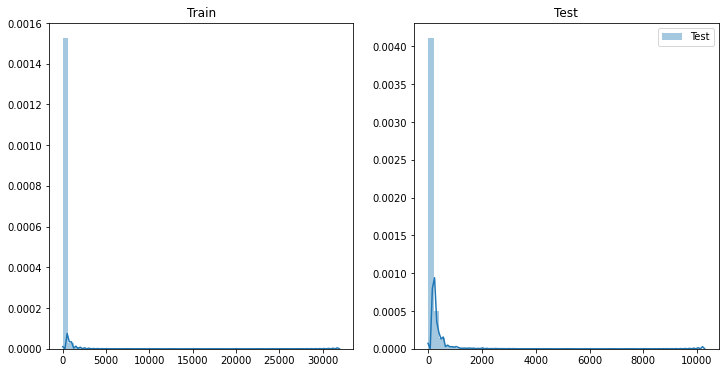

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(data["TransactionAmt"].values, label="Train")
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["TransactionAmt"].values, label="Test")
plt.title("Test")
plt.legend()
plt.show()

most of the points in the train data for TransactionAmt are less than 5000, and all the values of TransactionAmt for Test data are less than 10000 so we have to check the presence of outliers in train data for TransactionAmt feature.

since the distribution of the TransactionAmt is like a skewed distribution so lets take log of the TransactionAmt which might be like gaussion distribution.

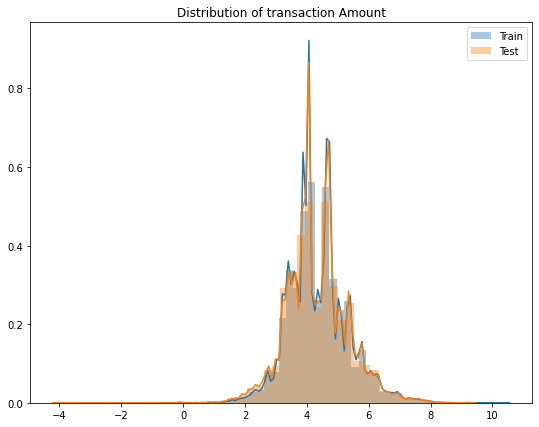

In [ ]:
plt.figure(figsize=(9,7))
sns.distplot(np.log(data["TransactionAmt"].values), label="Train")
sns.distplot(np.log(test_data["TransactionAmt"].values), label="Test")
plt.title("Distribution of transaction Amount")
plt.legend()
plt.show()

**LogTransactionAmt of train and test are look like very similar.**

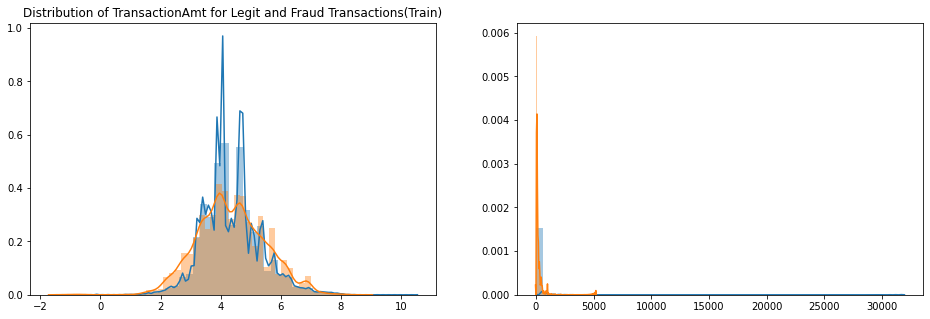

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(np.log(data[data["isFraud"]==0]["TransactionAmt"].values), label="Legit Transaction")
sns.distplot(np.log(data[data["isFraud"]==1]["TransactionAmt"].values), label="Fraud Transaction")
plt.title("Distribution of TransactionAmt for Legit and Fraud Transactions(Train)")
plt.subplot(1,2,2)
sns.distplot((data[data["isFraud"]==0]["TransactionAmt"].values), label="Legit Transaction")
sns.distplot((data[data["isFraud"]==1]["TransactionAmt"].values), label="Fraud Transaction")
plt.show()

log of TransactionAmt has more separating power than transactionAmt 

In [ ]:
# convert transactionamt to log of transactionamt which shows like gaussion dritribution
data["logTransactionAmt"] = np.log(data["TransactionAmt"].values)
test_data["logTransactionAmt"] = np.log(test_data["TransactionAmt"].values)

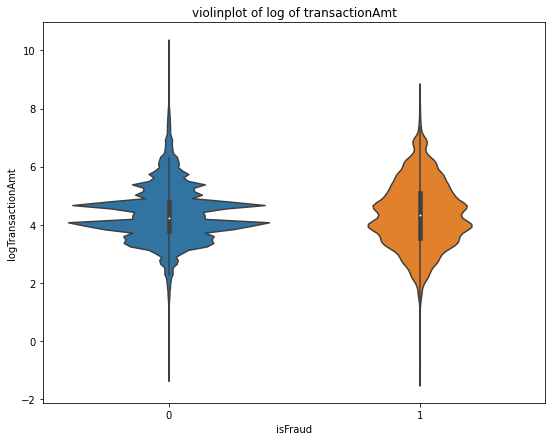

In [ ]:
plt.figure(figsize=(9,7))
sns.violinplot(x="isFraud", y="logTransactionAmt", data=data)
plt.title("violinplot of log of transactionAmt")
plt.show()

In [ ]:
quantile_TransactionAmt = data.TransactionAmt.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of TransactionAmt is {}".format(int(i*100), quantile_TransactionAmt[i]))

0th percentile value of TransactionAmt is 0.2509765625
10th percentile value of TransactionAmt is 25.953125
20th percentile value of TransactionAmt is 35.9375
30th percentile value of TransactionAmt is 49.0
40th percentile value of TransactionAmt is 57.9375
50th percentile value of TransactionAmt is 68.75
60th percentile value of TransactionAmt is 100.0
70th percentile value of TransactionAmt is 117.0
80th percentile value of TransactionAmt is 160.0
90th percentile value of TransactionAmt is 275.25
100th percentile value of TransactionAmt is 31936.0


In [ ]:
quantile_TransactionAmt = test_data.TransactionAmt.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of TransactionAmt is {}".format(int(i*100), quantile_TransactionAmt[i]))

0th percentile value of TransactionAmt is 0.01800537109375
10th percentile value of TransactionAmt is 25.0
20th percentile value of TransactionAmt is 35.34375
30th percentile value of TransactionAmt is 49.0
40th percentile value of TransactionAmt is 57.9375
50th percentile value of TransactionAmt is 67.9375
60th percentile value of TransactionAmt is 100.0
70th percentile value of TransactionAmt is 117.0
80th percentile value of TransactionAmt is 160.0
90th percentile value of TransactionAmt is 268.0
100th percentile value of TransactionAmt is 10272.0


In [ ]:
data = data[data["TransactionAmt"]<=10272.0]
data.shape

(590538, 439)

## **Analysis of ProductCD feature :**

In [ ]:
print(data["ProductCD"].isnull().sum())
print(test_data["ProductCD"].isnull().sum())

0
0


In [ ]:
data["ProductCD"].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

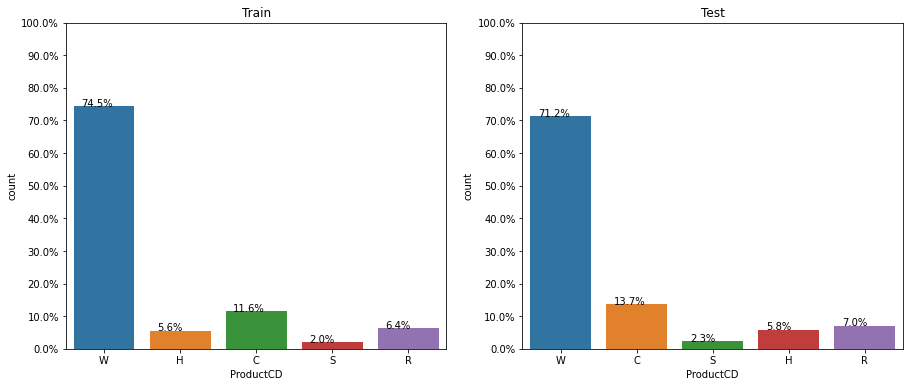

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
total = int(data.shape[0])
ax=sns.countplot(x="ProductCD", data=data)
plt.title("Train")
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))

ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.subplot(1,2,2)
total = int(test_data.shape[0])
ax=sns.countplot(x="ProductCD", data=test_data)
plt.title("Test")
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))
 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

The relative occurance of various productcd is similar in train and test data

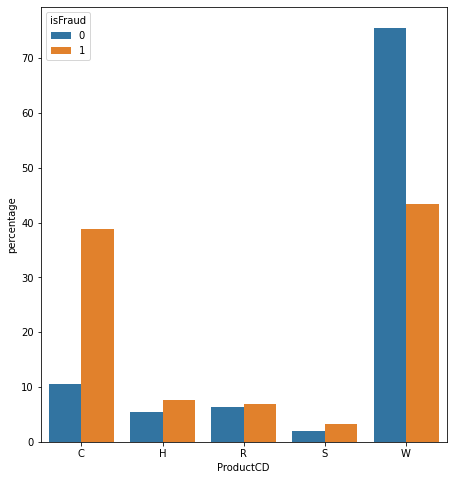

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
ProductCD = data.groupby(['isFraud'])['ProductCD'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('ProductCD')
sns.barplot(x="ProductCD", y="percentage", hue="isFraud", data=ProductCD)
plt.show()

transaction whose productcd is C,H,R,S are more likely to be fraud transactions

# **Analysis of card-1 to card-6 features :**

In [ ]:
data[["card1","card2","card3","card4","card5","card6"]].isnull().sum()

card1       0
card2    8933
card3    1565
card4    1577
card5    4259
card6    1571
dtype: int64

## **card-1 :**

In [ ]:
data["card1"].describe()

count    590540.000000
mean       9898.734658
std        4901.170153
min        1000.000000
25%        6019.000000
50%        9678.000000
75%       14184.000000
max       18396.000000
Name: card1, dtype: float64

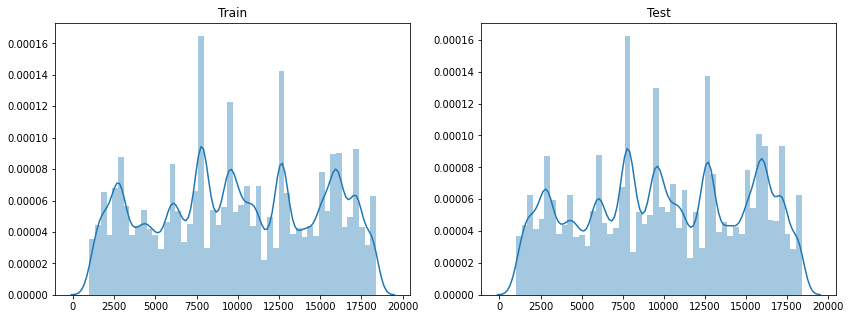

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["card1"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["card1"].values)
plt.title("Test")
plt.show()

The distribution of Card1 feature for train and test data are very similar , frequency of same value are also very similar.

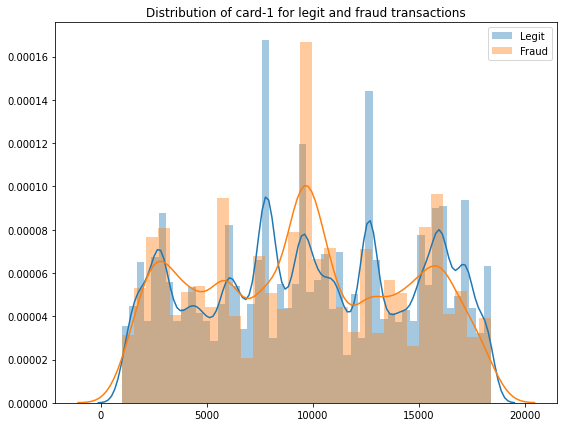

In [ ]:
plt.figure(figsize=(9,7))
sns.distplot(data[data["isFraud"]==0]["card1"].values, label="Legit")
sns.distplot(data[data["isFraud"]==1]["card1"].values, label="Fraud")
plt.title("Distribution of card-1 for legit and fraud transactions")
plt.legend()
plt.show()

At some value fraud transaction is more and some other values of card1 legit transactions are more so this is an important feature.

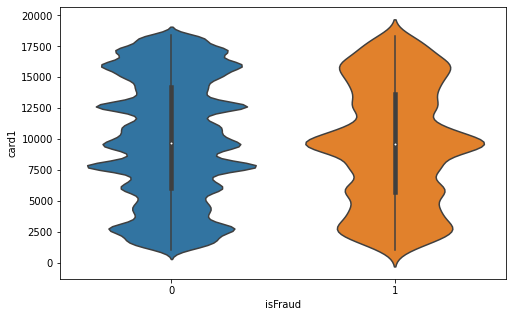

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x="isFraud", y="card1", data=data)
plt.show()

## **card-2 :**

In [ ]:
data["card2"].describe()

count    581607.0
mean          NaN
std           NaN
min         100.0
25%         214.0
50%         361.0
75%         512.0
max         600.0
Name: card2, dtype: float64

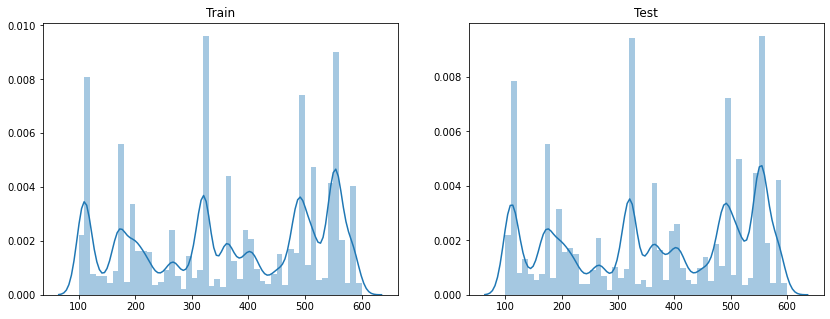

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["card2"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["card2"].values)
plt.title("Test")
plt.show()

Since it is the time series data thats why the pattern oaf the PDF of train and test data for Card2 are very similar and ranging in the same range, actually we want similar distribution of the train and test data so that model can gave similar generalization auc as train auc. 

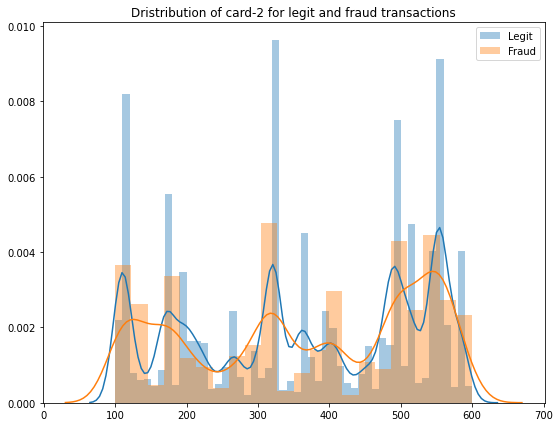

In [ ]:
plt.figure(figsize=(9,7))
sns.distplot(data[data["isFraud"]==0]["card2"].values, label="Legit")
sns.distplot(data[data["isFraud"]==1]["card2"].values, label="Fraud")
plt.title("Dristribution of card-2 for legit and fraud transactions")
plt.legend()
plt.show()

for some points legit transacctions are more and for some other points fraud transactions are more but it overlape in high extent so this ferature can be responsible for the separation of fraud transactions from legit transactions. 

/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:153: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:163: RuntimeWarning: invalid value encountered in add
  y += start


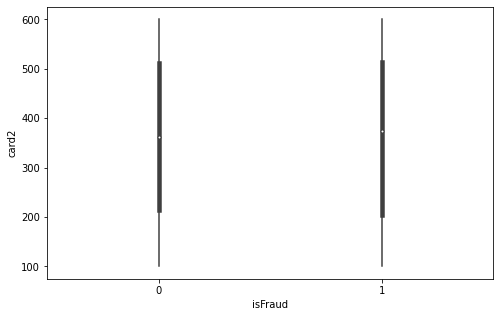

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x="isFraud", y="card2", data=data)
plt.show()

The median of fraud transactions are slightly above the legit transactions.

# **card-3 :**

In [ ]:
data["card3"].describe()

count    588975.0
mean          NaN
std           0.0
min         100.0
25%         150.0
50%         150.0
75%         150.0
max         231.0
Name: card3, dtype: float64

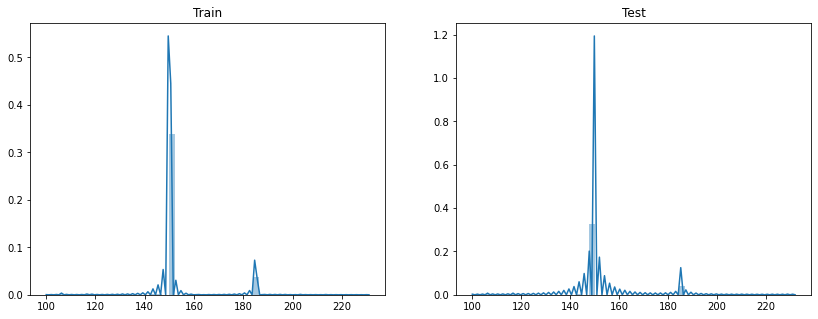

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["card3"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["card3"].values)
plt.title("Test")
plt.show()

majority of the points for train and test data for card3 feature are between 135 to 160 

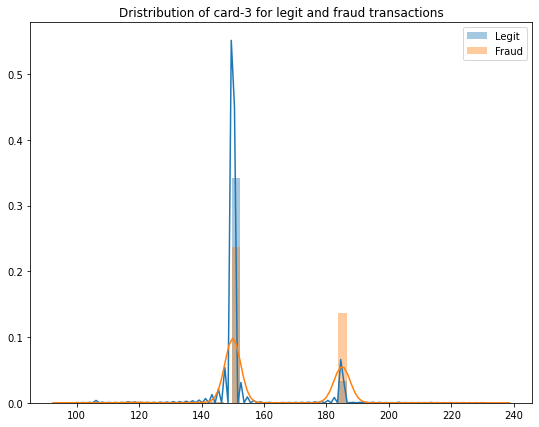

In [ ]:
plt.figure(figsize=(9,7))
sns.distplot(data[data["isFraud"]==0]["card3"].values, label="Legit")
sns.distplot(data[data["isFraud"]==1]["card3"].values, label="Fraud")
plt.title("Dristribution of card-3 for legit and fraud transactions")
plt.legend()
plt.show()

values between 140 to 160 are more likely to be legit but the values between 180 to 190 are more likely to be fraud.

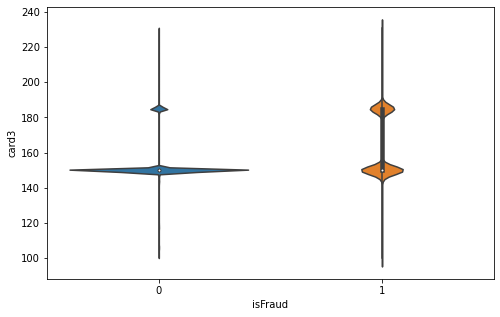

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x="isFraud", y="card3", data=data)
plt.show()

In [ ]:
quantile_card_3_legit = data["card3"].quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of card-3(Legit) is {}".format(int(i*100), quantile_card_3_legit[i]))

0th percentile value of card-3(Legit) is 100.0
10th percentile value of card-3(Legit) is 150.0
20th percentile value of card-3(Legit) is 150.0
30th percentile value of card-3(Legit) is 150.0
40th percentile value of card-3(Legit) is 150.0
50th percentile value of card-3(Legit) is 150.0
60th percentile value of card-3(Legit) is 150.0
70th percentile value of card-3(Legit) is 150.0
80th percentile value of card-3(Legit) is 150.0
90th percentile value of card-3(Legit) is 150.0
100th percentile value of card-3(Legit) is 231.0


In [ ]:
quantile_card_3_legit = test_data["card3"].quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of card-3(Legit) is {}".format(int(i*100), quantile_card_3_legit[i]))

0th percentile value of card-3(Legit) is 100.0
10th percentile value of card-3(Legit) is 150.0
20th percentile value of card-3(Legit) is 150.0
30th percentile value of card-3(Legit) is 150.0
40th percentile value of card-3(Legit) is 150.0
50th percentile value of card-3(Legit) is 150.0
60th percentile value of card-3(Legit) is 150.0
70th percentile value of card-3(Legit) is 150.0
80th percentile value of card-3(Legit) is 150.0
90th percentile value of card-3(Legit) is 185.0
100th percentile value of card-3(Legit) is 232.0


## **card-4 :**

In [ ]:
data["card4"].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

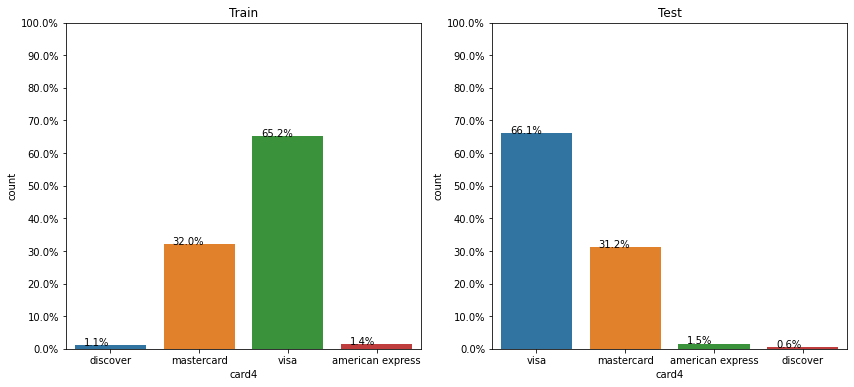

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
total = int(data.shape[0])
ax=sns.countplot(x="card4", data=data)
plt.title("Train")
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))
 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.subplot(1,2,2)
total = int(test_data.shape[0])
ax=sns.countplot(x="card4", data=test_data)
plt.title("Test")
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))
 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

in train data 62.2% transaction done by visa card and in test 66.1%

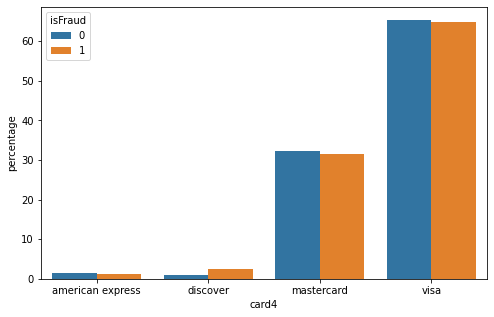

In [ ]:
plt.figure(figsize=(8,5))

card_4 = data.groupby(['isFraud'])['card4'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('card4')
sns.barplot(x="card4", y="percentage", hue="isFraud", data=card_4)
plt.show()

card4 feature can seperate fraud transaction from legit transaction in some extent

In [ ]:
#frequency encoding feature of Card4
temp = data["card4"].value_counts().to_dict()
data["card4_counts"] = data["card4"].map(temp)
test_data["card4_counts"] = test_data["card4"].map(temp)

## **card-5 :**

In [ ]:
data["card5"].describe()

count    586281.0
mean          NaN
std           0.0
min         100.0
25%         166.0
50%         226.0
75%         226.0
max         237.0
Name: card5, dtype: float64

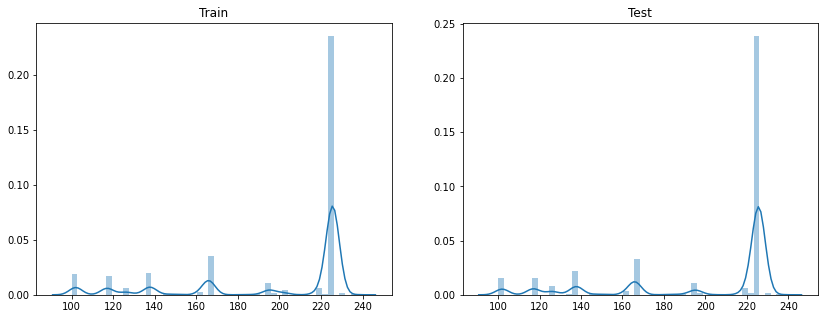

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["card5"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["card5"].values)
plt.title("Test")
plt.show()

card5 shows periodic nature. but frequency of points whose values lies near 220 are very high 

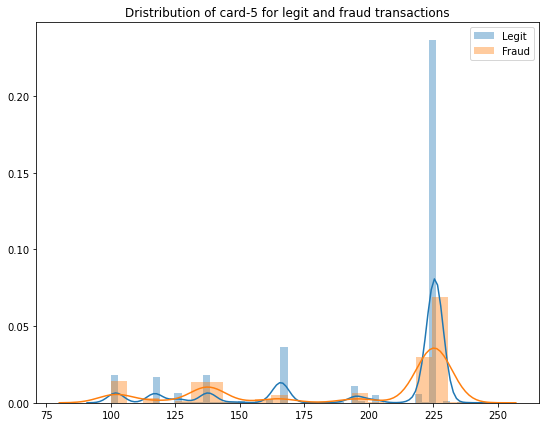

In [ ]:
plt.figure(figsize=(9,7))
sns.distplot(data[data["isFraud"]==0]["card5"].values, label="Legit")
sns.distplot(data[data["isFraud"]==1]["card5"].values, label="Fraud")
plt.title("Dristribution of card-5 for legit and fraud transactions")
plt.legend()
plt.show()

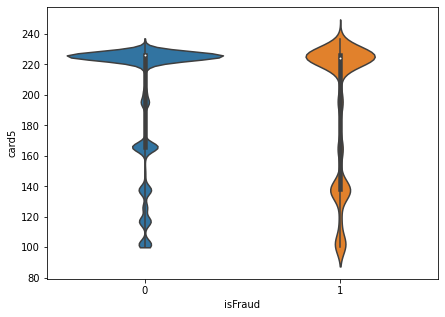

In [ ]:
plt.figure(figsize=(7,5))
sns.violinplot(x="isFraud", y="card5", data=data)
plt.show()

In [ ]:
quantile_card_5_legit = data["card5"].quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of card-5(Legit) is {}".format(int(i*100), quantile_card_5_legit[i]))

0th percentile value of card-5(Legit) is 100.0
10th percentile value of card-5(Legit) is 126.0
20th percentile value of card-5(Legit) is 166.0
30th percentile value of card-5(Legit) is 195.0
40th percentile value of card-5(Legit) is 224.0
50th percentile value of card-5(Legit) is 226.0
60th percentile value of card-5(Legit) is 226.0
70th percentile value of card-5(Legit) is 226.0
80th percentile value of card-5(Legit) is 226.0
90th percentile value of card-5(Legit) is 226.0
100th percentile value of card-5(Legit) is 237.0


In [ ]:
quantile_card_5_legit = test_data["card5"].quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of card-5(Legit) is {}".format(int(i*100), quantile_card_5_legit[i]))

0th percentile value of card-5(Legit) is 100.0
10th percentile value of card-5(Legit) is 126.0
20th percentile value of card-5(Legit) is 166.0
30th percentile value of card-5(Legit) is 195.0
40th percentile value of card-5(Legit) is 224.0
50th percentile value of card-5(Legit) is 226.0
60th percentile value of card-5(Legit) is 226.0
70th percentile value of card-5(Legit) is 226.0
80th percentile value of card-5(Legit) is 226.0
90th percentile value of card-5(Legit) is 226.0
100th percentile value of card-5(Legit) is 237.0


distribution of the Card-5 for train and test are very similar

## **card-6 :**

In [ ]:
data["card6"].value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

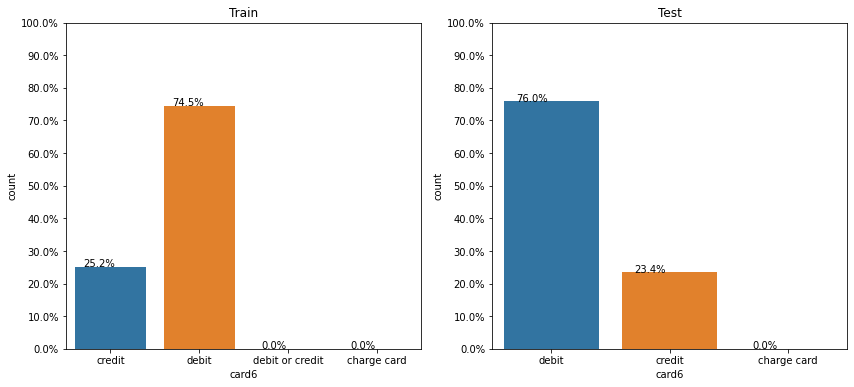

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
total = int(data.shape[0])
ax=sns.countplot(x="card6", data=data)
plt.title("Train")
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))
 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.subplot(1,2,2)
total = int(test_data.shape[0])
ax=sns.countplot(x="card6", data=test_data)
plt.title("Test")
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))
 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

The precentage of debit or credit and charge card are almost 0% that's why we can convert these two card to debit card.

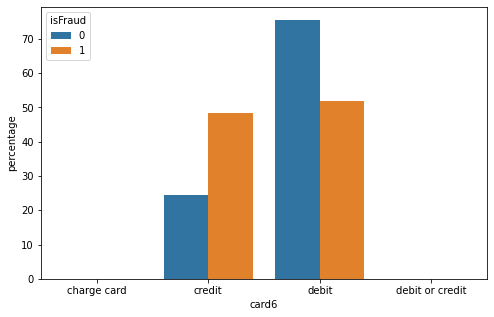

In [ ]:
plt.figure(figsize=(8,5))

card_4 = data.groupby(['isFraud'])['card6'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('card6')
sns.barplot(x="card6", y="percentage", hue="isFraud", data=card_4)
plt.show()

The occurance of charge card and debit or credit is very less(almost to 0.0%) it may lead to the presence of outliers in data.

In [ ]:
#since charge and debit or credit has very less occurance
def changeValue(value):
  if value=="charge card" or value=="debit or credit":
    return "debit"
  else:
    return value 
data["card6"] = data["card6"].apply(changeValue) 
test_data["card6"] = test_data["card6"].apply(changeValue)    

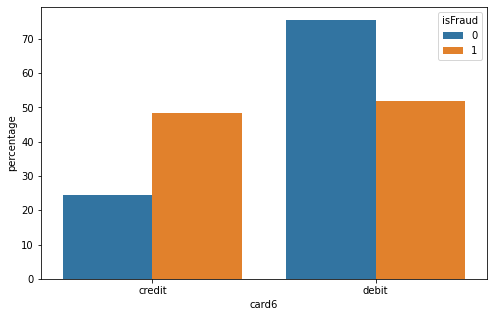

In [ ]:
plt.figure(figsize=(8,5))

card_4 = data.groupby(['isFraud'])['card6'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('card6')
sns.barplot(x="card6", y="percentage", hue="isFraud", data=card_4)
plt.show()

Transactions by credit card are more likely to be fraudulent transactions and transactions by debit card are more likely to be legit transactions.

## **Analysis of addr1 and addr2 features :**

### **addr1 :**

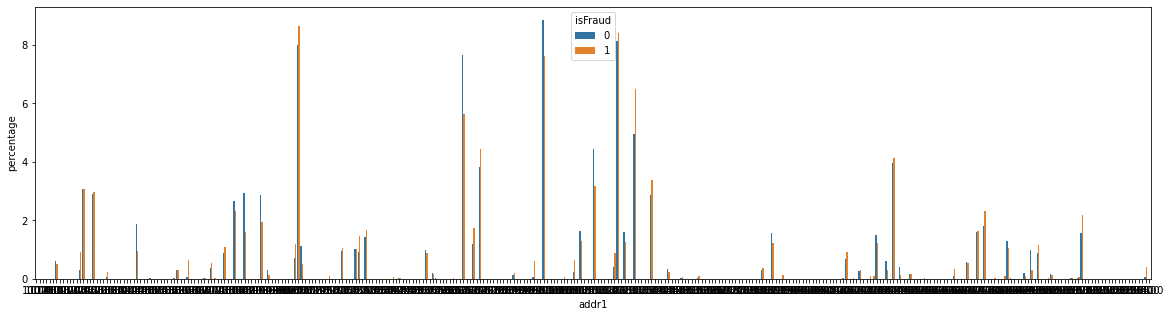

In [ ]:
plt.figure(figsize=(20,5))

addr_1 = data.groupby(['isFraud'])['addr1'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('addr1')
sns.barplot(x="addr1", y="percentage", hue="isFraud", data=addr_1)
plt.show()

in some regions fraud transactions happened more and in some other regions legit transactions happened more. so it would be an important feature in classification.

### **addr2 :**

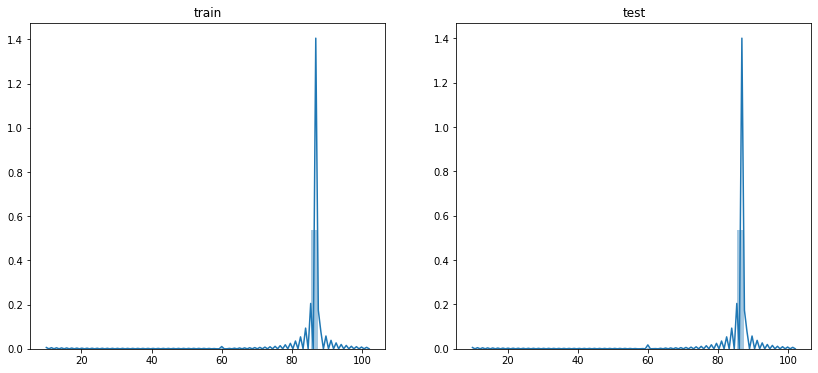

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data["addr2"].values)
plt.title("train")
plt.subplot(1,2,2)
sns.distplot(test_data["addr2"].values)
plt.title("test")
plt.show()

most transactions happened in the country whose code lies between 180 to 100 .

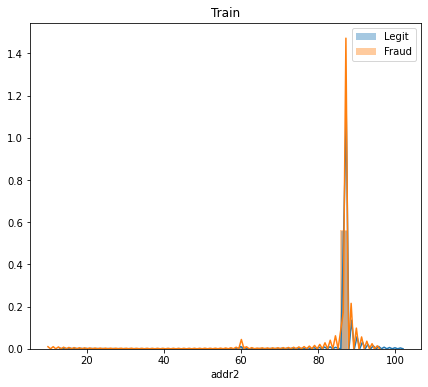

In [ ]:
plt.figure(figsize=(7,6))
sns.distplot(data[(data['isFraud']==0) & (~data['addr2'].isnull())]['addr2'])
sns.distplot(data[(data['isFraud']==1) & (~data['addr2'].isnull())]['addr2'])
plt.legend(['Legit','Fraud'])
plt.title('Train')
plt.show()

addr2 is the countery code where transaction happened, from distplot it observed that most of the transactions happened in countaries whose code lies between 80 to 100 for both legit and fraud transactions.

## **Analysis of dist1 and dist2 features:**

## **dist1 :**

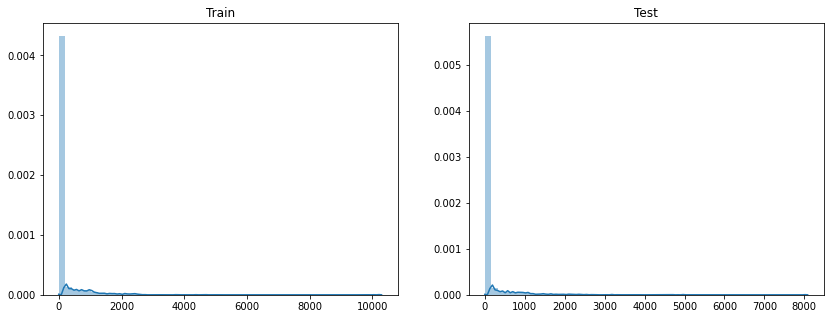

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["dist1"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["dist1"].values)
plt.title("Test")
plt.show()

some outliers are there in train data

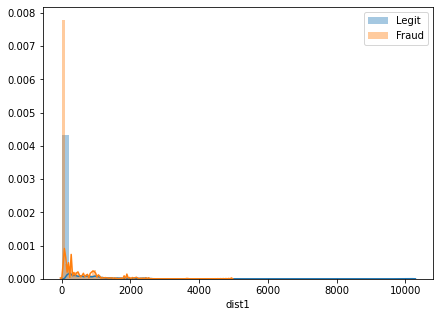

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["dist1"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["dist1"], label="Fraud")
plt.legend()
plt.show()

it can seperate in some extent, because if distance are more then transactions are more likely to be fraudulent transactions and if distance is less then transactions are more likely to be legit transactions.

In [ ]:
quantile_dist_1 = data["dist1"].quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of dist-1 is {}".format(int(i*100), quantile_dist_1[i]))

0th percentile value of dist-1 is 0.0
10th percentile value of dist-1 is 1.0
20th percentile value of dist-1 is 2.0
30th percentile value of dist-1 is 4.0
40th percentile value of dist-1 is 6.0
50th percentile value of dist-1 is 8.0
60th percentile value of dist-1 is 12.0
70th percentile value of dist-1 is 18.0
80th percentile value of dist-1 is 36.0
90th percentile value of dist-1 is 268.0
100th percentile value of dist-1 is 10288.0


In [ ]:
qValues = np.round(np.arange(0.91, 1.01, 0.01), 3)
for i in qValues:
    print("{} percentile value of dist-1 is {}".format(int(i*100), quantile_dist_1[i]))

91 percentile value of dist-1 is 350.0
92 percentile value of dist-1 is 455.0
93 percentile value of dist-1 is 580.0
94 percentile value of dist-1 is 714.0
95 percentile value of dist-1 is 846.0
96 percentile value of dist-1 is 991.0
97 percentile value of dist-1 is 1133.0
98 percentile value of dist-1 is 1472.0
99 percentile value of dist-1 is 2040.0
100 percentile value of dist-1 is 10288.0


In [ ]:
quantile_dist_1 = data.dist1.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of dist-1 is {}".format((i*100), quantile_dist_1[i]))

99.1 percentile value of dist-1 is 2112.0
99.2 percentile value of dist-1 is 2148.0
99.3 percentile value of dist-1 is 2214.0
99.4 percentile value of dist-1 is 2294.0
99.5 percentile value of dist-1 is 2360.0
99.6 percentile value of dist-1 is 2412.0
99.7 percentile value of dist-1 is 2458.0
99.8 percentile value of dist-1 is 2550.0
99.9 percentile value of dist-1 is 3248.0
100.0 percentile value of dist-1 is 10288.0


it shows that there are some outliers may present so we should have to remove all the data points for which dist1 feature are greater than some threshold value.

In [ ]:
quantile_dist_1 = test_data["dist1"].quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of dist-1 is {}".format(int(i*100), quantile_dist_1[i]))

0th percentile value of dist-1 is 0.0
10th percentile value of dist-1 is 1.0
20th percentile value of dist-1 is 2.0
30th percentile value of dist-1 is 3.0
40th percentile value of dist-1 is 5.0
50th percentile value of dist-1 is 8.0
60th percentile value of dist-1 is 11.0
70th percentile value of dist-1 is 16.0
80th percentile value of dist-1 is 28.0
90th percentile value of dist-1 is 120.0
100th percentile value of dist-1 is 8080.0


In [ ]:
quantile_dist_1 = test_data["dist1"].quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))
qValues = np.round(np.arange(0.91, 1.01, 0.01), 3)
for i in qValues:
    print("{} percentile value of dist-1 is {}".format(int(i*100), quantile_dist_1[i]))

91 percentile value of dist-1 is 158.0
92 percentile value of dist-1 is 211.0
93 percentile value of dist-1 is 287.0
94 percentile value of dist-1 is 411.0
95 percentile value of dist-1 is 561.0
96 percentile value of dist-1 is 717.0
97 percentile value of dist-1 is 913.0
98 percentile value of dist-1 is 1128.0
99 percentile value of dist-1 is 1677.0
100 percentile value of dist-1 is 8080.0


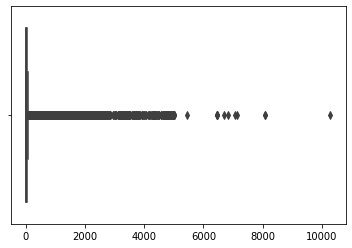

In [ ]:
sns.boxplot(data["dist1"].values)
plt.show()

In [ ]:
# Remove all the datapoints for which dist1 value is more than 8k.
data = data[(data["dist1"]<=8080.0) | (data["dist1"].isnull())]
data.shape

(590537, 440)

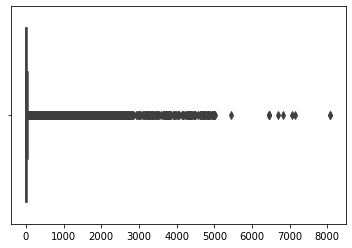

In [ ]:
sns.boxplot(data["dist1"].values)
plt.show()

### **dist2 :**

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["dist2"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["dist2"].values)
plt.title("Test")
plt.show()

In [ ]:
quantile_dist_1 = data["dist2"].quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))
qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of dist-2 is {}".format(int(i*100), quantile_dist_1[i]))

0th percentile value of dist-2 is 0.0
10th percentile value of dist-2 is 1.0
20th percentile value of dist-2 is 7.0
30th percentile value of dist-2 is 7.0
40th percentile value of dist-2 is 13.0
50th percentile value of dist-2 is 37.0
60th percentile value of dist-2 is 87.0
70th percentile value of dist-2 is 162.0
80th percentile value of dist-2 is 306.75
90th percentile value of dist-2 is 634.5
100th percentile value of dist-2 is 11624.0


In [ ]:
qValues = np.round(np.arange(0.91, 1.01, 0.01), 3)
for i in qValues:
    print("{} percentile value of dist-2 is {}".format(int(i*100), quantile_dist_1[i]))

91 percentile value of dist-2 is 720.0
92 percentile value of dist-2 is 764.0
93 percentile value of dist-2 is 810.0
94 percentile value of dist-2 is 908.5
95 percentile value of dist-2 is 1001.0
96 percentile value of dist-2 is 1336.0
97 percentile value of dist-2 is 1626.0
98 percentile value of dist-2 is 1973.0
99 percentile value of dist-2 is 2368.0
100 percentile value of dist-2 is 11624.0


In [ ]:
quantile_dist_1 = test_data["dist2"].quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of dist-2 is {}".format(int(i*100), quantile_dist_1[i]))

0th percentile value of dist-2 is 0.0
10th percentile value of dist-2 is 1.0
20th percentile value of dist-2 is 6.0
30th percentile value of dist-2 is 9.0
40th percentile value of dist-2 is 20.0
50th percentile value of dist-2 is 44.0
60th percentile value of dist-2 is 82.0
70th percentile value of dist-2 is 149.0
80th percentile value of dist-2 is 280.0
90th percentile value of dist-2 is 710.0
100th percentile value of dist-2 is 9216.0


since all the values of dist2 for test data lies within 10k, and 99% of train values are less than 2400 so we should remove all the datapoints from train data for which dist2 values are greater than 10k.

In [ ]:
# remove all the data points for which dist2 value is more than 10k.
data = data[(data["dist2"]<=9216.0) | (data["dist2"].isnull())]
data.shape

(590533, 440)

## **Analysis of P_emaildomain and R_emaildomain features :**

### **P_emaildomain :**

In [ ]:
data["P_emaildomain"].value_counts()

gmail.com           228349
yahoo.com           100932
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com            230
t

As we can see we have mails from jp(japan),fr(france),de(german),uk(britain),mx(mexico),es(spain)
we will create a new feaure based of this observation.

In [ ]:
# it will return the email domain
def returnfirst(email):
    return email.split(".")[0]

In [ ]:
data['first_domain'] = data[~data['P_emaildomain'].isnull()]['P_emaildomain'].apply(returnfirst)
test_data["first_domain"] = test_data[~test_data["P_emaildomain"].isnull()]["P_emaildomain"].apply(returnfirst)

In [ ]:
# https://www.kaggle.com/kabure/almost-complete-feature-engineering-ieee-data
# https://www.kaggle.com/c/ieee-fraud-detection/discussion/100499#latest-579654
# convert email domain to its corresponding company and create a feature for email suffix

emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum',
'scranton.edu': 'other', 'optonline.net': 'other', 'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr'
: 'yahoo', 'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com':
'microsoft', 'aim.com': 'aol', 'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink', 
'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 'gmx.de': 'other', 
'web.de': 'other', 'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 'protonmail.com': 'other', 
'hotmail.fr': 'microsoft', 'windstream.net': 'other', 'outlook.es': 'microsoft', 
'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo', 'servicios-ta.com': 'other', 'netzero.net': 'other', 
'suddenlink.net': 'other', 'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft', 
'verizon.net': 'yahoo', 'msn.com': 'microsoft', 'q.com': 'centurylink',
'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 'rocketmail.com': 'yahoo', 
'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 
'mail.com': 'other', 'bellsouth.net': 'other', 'embarqmail.com': 'centurylink', 
'cableone.net': 'other', 'hotmail.es': 'microsoft', 'mac.com':
'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 'yahoo.com':
'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other', 'aol.com': 'aol', 
'juno.com': 'other', 'icloud.com': 'apple'}
us_emails = ['gmail', 'net', 'edu']
for c in ['P_emaildomain', 'R_emaildomain']:
    data[c + '_bin'] = data[c].map(emails)
    test_data[c + '_bin'] = test_data[c].map(emails)
    data[c + '_suffix'] = data[c].map(lambda x: str(x).split('.')[-1])
    test_data[c + '_suffix'] = test_data[c].map(lambda x: str(x).split('.')[-1])
    data[c + '_suffix'] = data[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')
    test_data[c + '_suffix'] = test_data[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')

In [ ]:
data.drop(["first_domain"], axis=1, inplace=True)
test_data.drop(["first_domain"], axis=1, inplace=True)

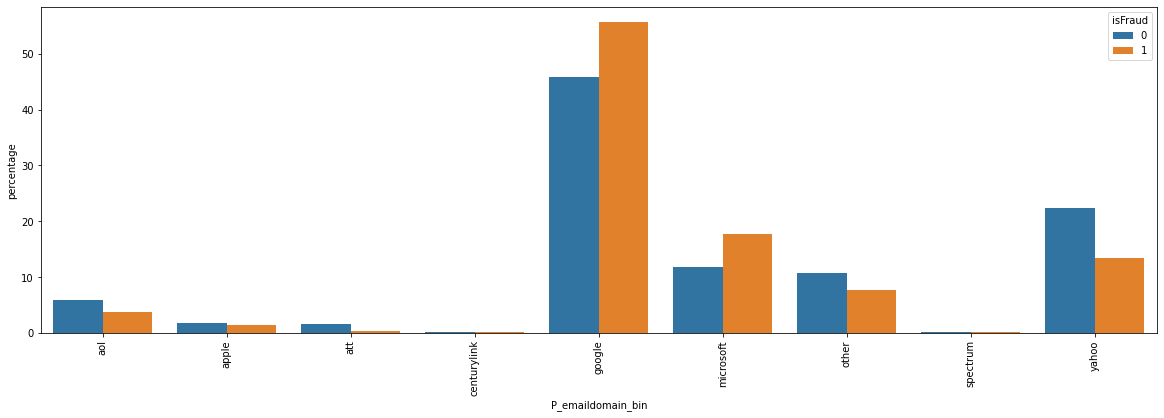

In [ ]:
first_domain = data.groupby(['isFraud'])['P_emaildomain_bin'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('P_emaildomain_bin')
plt.figure(figsize=(20,6))

sns.barplot(x="P_emaildomain_bin", y="percentage", hue="isFraud", data=first_domain)
plt.xticks(rotation=90)
plt.show()

most transactions happened through the google(Gmail) and hence more transactions are fraudulent by the user of gmail.And the user having email domain of Yahoo,aol and some other are more likely to done legit transactions.

## **Analysis of C1 to C14 features :**

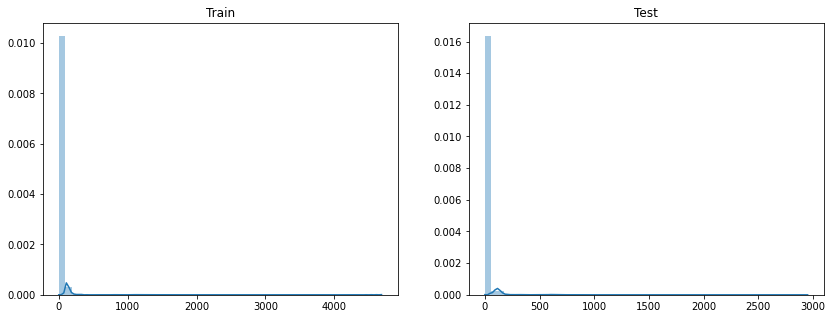

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["C1"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["C1"].values)
plt.title("Test")
plt.show()

most frequent values for c1 of train and test are very less near to zero and the distribution is like a skewed distribution.

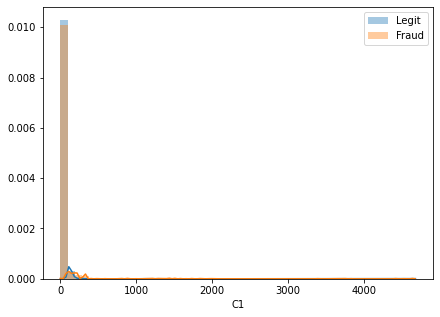

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["C1"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["C1"], label= "Fraud")
plt.legend()
plt.show()

The distribution for fraud and legit are overlapping in much amount.

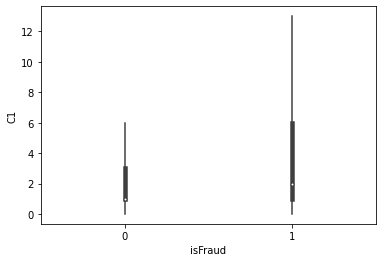

In [ ]:
sns.violinplot(x="isFraud", y="C1", data=data)
plt.show()

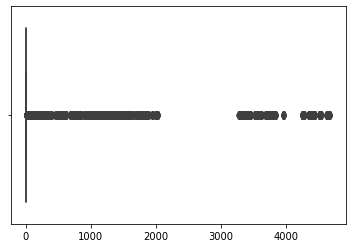

In [ ]:
sns.boxplot(data["C1"].values)
plt.show()

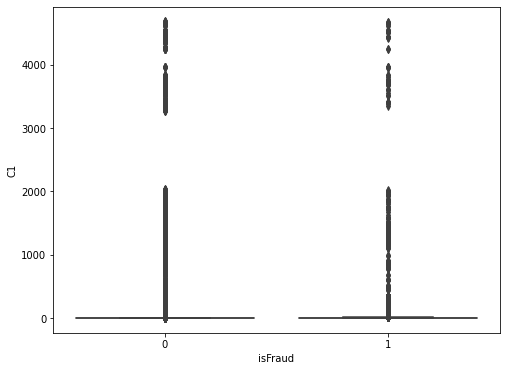

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="isFraud", y="C1", data=data)
plt.show()

In [ ]:
quantile_c1 = data.C1.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of c1 is {}".format(int(i*100), quantile_c1[i]))

0th percentile value of c1 is 0.0
10th percentile value of c1 is 1.0
20th percentile value of c1 is 1.0
30th percentile value of c1 is 1.0
40th percentile value of c1 is 1.0
50th percentile value of c1 is 1.0
60th percentile value of c1 is 2.0
70th percentile value of c1 is 2.0
80th percentile value of c1 is 3.0
90th percentile value of c1 is 7.0
100th percentile value of c1 is 4684.0


In [ ]:
quantile_c1 = data.C1.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of c1 is {}".format(int(i*100), quantile_c1[i]))

91th percentile value of c1 is 7.0
92th percentile value of c1 is 8.0
93th percentile value of c1 is 10.0
94th percentile value of c1 is 13.0
95th percentile value of c1 is 22.0
96th percentile value of c1 is 79.0
97th percentile value of c1 is 110.0
98th percentile value of c1 is 132.0
99th percentile value of c1 is 164.0
100th percentile value of c1 is 4684.0


In [ ]:
quantile_c1 = data.C1.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))

qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{}th percentile value of c1 is {}".format(int(i*100), quantile_c1[i]))

99th percentile value of c1 is 169.0
99th percentile value of c1 is 178.0
99th percentile value of c1 is 190.0
99th percentile value of c1 is 204.0
99th percentile value of c1 is 234.0
99th percentile value of c1 is 307.0
99th percentile value of c1 is 834.0
99th percentile value of c1 is 1262.0
99th percentile value of c1 is 1844.0
100th percentile value of c1 is 4684.0


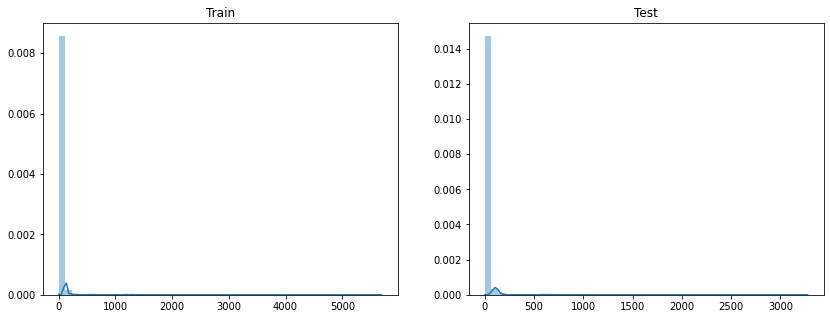

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["C2"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["C2"].values)
plt.title("Test")
plt.show()

distribution of C2 feature for train and test dataset are almost similar but for train the frequency of values near Zero are more for train dataset.

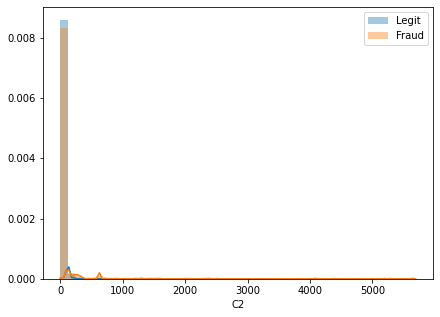

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["C2"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["C2"], label= "Fraud")
plt.legend()
plt.show()

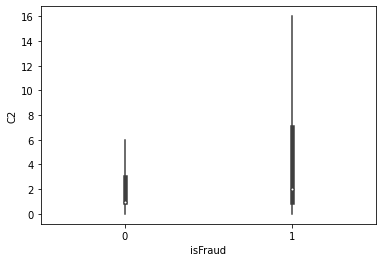

In [ ]:
sns.violinplot(x="isFraud", y="C2", data=data)
plt.show()

This plot shows that higher values corresponds to fraudulent transactions.

In [ ]:
quantile_c2 = data.C2.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of c2 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of c2 is 0.0
10th percentile value of c2 is 1.0
20th percentile value of c2 is 1.0
30th percentile value of c2 is 1.0
40th percentile value of c2 is 1.0
50th percentile value of c2 is 1.0
60th percentile value of c2 is 2.0
70th percentile value of c2 is 2.0
80th percentile value of c2 is 4.0
90th percentile value of c2 is 7.0
100th percentile value of c2 is 5692.0


In [ ]:
quantile_c2 = data.C2.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))
qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of c2 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of c2 is 8.0
92th percentile value of c2 is 9.0
93th percentile value of c2 is 11.0
94th percentile value of c2 is 15.0
95th percentile value of c2 is 27.0
96th percentile value of c2 is 77.0
97th percentile value of c2 is 101.0
98th percentile value of c2 is 122.0
99th percentile value of c2 is 154.0
100th percentile value of c2 is 5692.0


In [ ]:
quantile_c2 = data.C2.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of c-2 is {}".format((i*100), quantile_c2[i]))

99.1 percentile value of c-2 is 160.0
99.2 percentile value of c-2 is 168.0
99.3 percentile value of c-2 is 178.0
99.4 percentile value of c-2 is 198.0
99.5 percentile value of c-2 is 250.0
99.6 percentile value of c-2 is 368.8719999999739
99.7 percentile value of c-2 is 1099.4839999995893
99.8 percentile value of c-2 is 1449.0
99.9 percentile value of c-2 is 2358.0
100.0 percentile value of c-2 is 5692.0


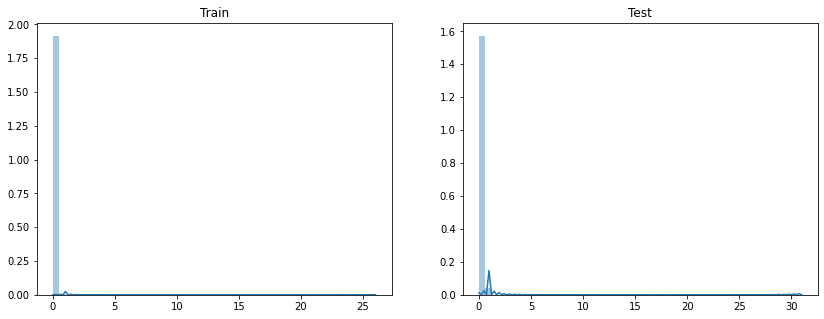

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["C3"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["C3"].values)
plt.title("Test")
plt.show()

The dispribution of each points are very similar but for train data the points whose values near zero have less frequency than taht values of test data.

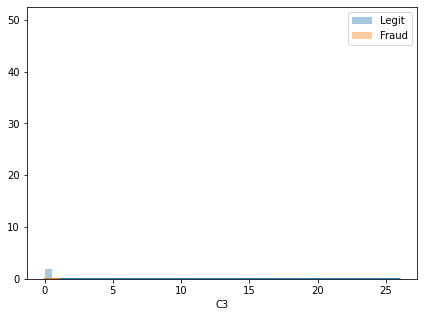

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["C3"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["C3"], label= "Fraud")
plt.legend()
plt.show()

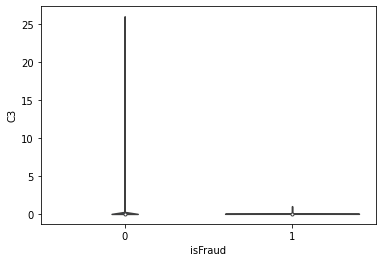

In [ ]:
sns.violinplot(x="isFraud", y="C3", data=data)
plt.show()

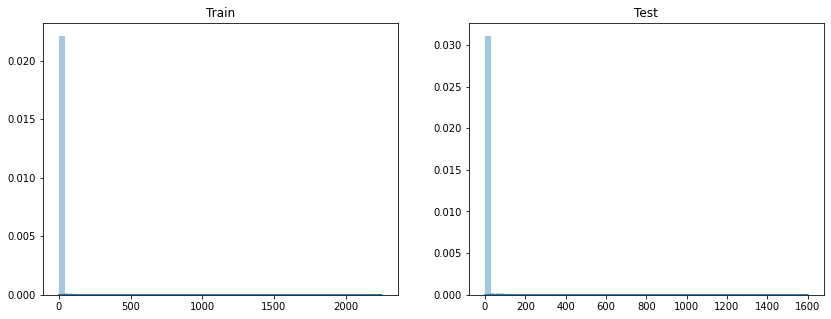

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["C4"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["C4"].values)
plt.title("Test")
plt.show()

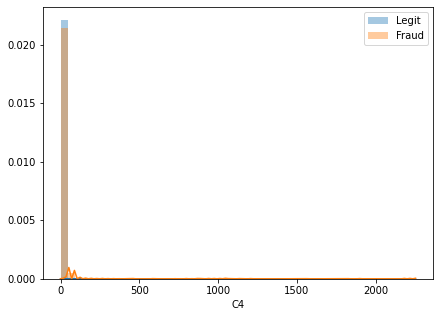

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["C4"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["C4"], label= "Fraud")
plt.legend()
plt.show()

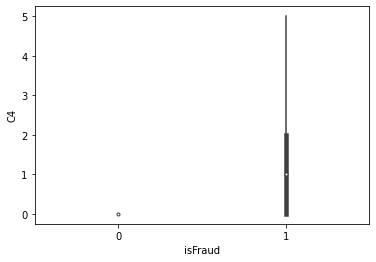

In [ ]:
sns.violinplot(x="isFraud", y="C4", data=data)
plt.show()

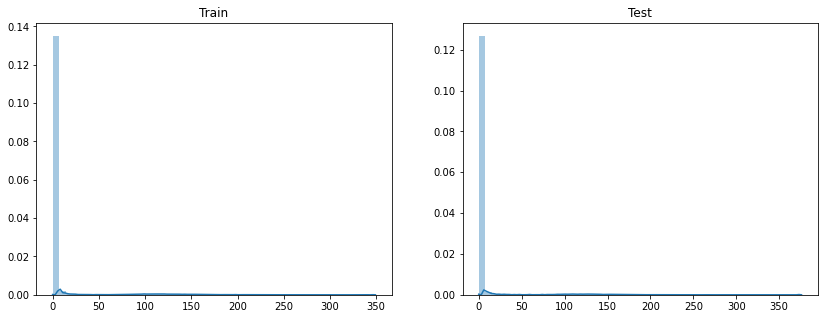

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["C5"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["C5"].values)
plt.title("Test")
plt.show()

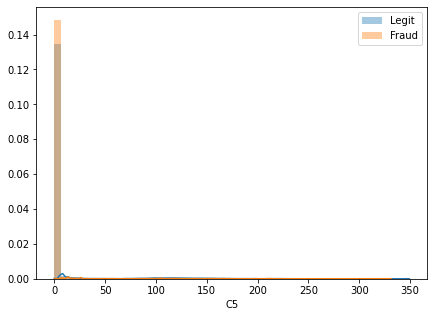

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["C5"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["C5"], label= "Fraud")
plt.legend()
plt.show()

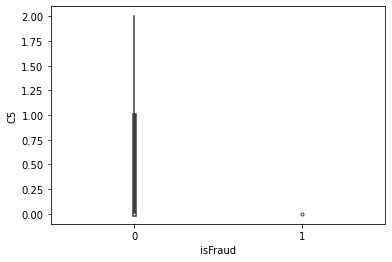

In [ ]:
sns.violinplot(x="isFraud", y="C5", data=data)
plt.show()

This plot shows that this feature will be less important while training model to seperate the fraudulent transactions from legit transactions because the percentage of points belonging to fraudulent transactions are very less in train data.

In [ ]:
quantile_c2 = data.C5.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of c5 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of c5 is 0.0
10th percentile value of c5 is 0.0
20th percentile value of c5 is 0.0
30th percentile value of c5 is 0.0
40th percentile value of c5 is 0.0
50th percentile value of c5 is 0.0
60th percentile value of c5 is 0.0
70th percentile value of c5 is 1.0
80th percentile value of c5 is 1.0
90th percentile value of c5 is 3.0
100th percentile value of c5 is 349.0


In [ ]:
quantile_c2 = data.C5.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of c5 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of c5 is 3.0
92th percentile value of c5 is 4.0
93th percentile value of c5 is 4.0
94th percentile value of c5 is 6.0
95th percentile value of c5 is 9.0
96th percentile value of c5 is 24.0
97th percentile value of c5 is 94.0
98th percentile value of c5 is 118.0
99th percentile value of c5 is 149.0
100th percentile value of c5 is 349.0


In [ ]:
quantile_c2 = data.C5.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of c5 is {}".format((i*100), quantile_c2[i]))

99.1 percentile value of c5 is 153.0
99.2 percentile value of c5 is 157.0
99.3 percentile value of c5 is 163.0
99.4 percentile value of c5 is 168.0
99.5 percentile value of c5 is 175.0
99.6 percentile value of c5 is 185.0
99.7 percentile value of c5 is 198.0
99.8 percentile value of c5 is 213.0
99.9 percentile value of c5 is 232.0
100.0 percentile value of c5 is 349.0


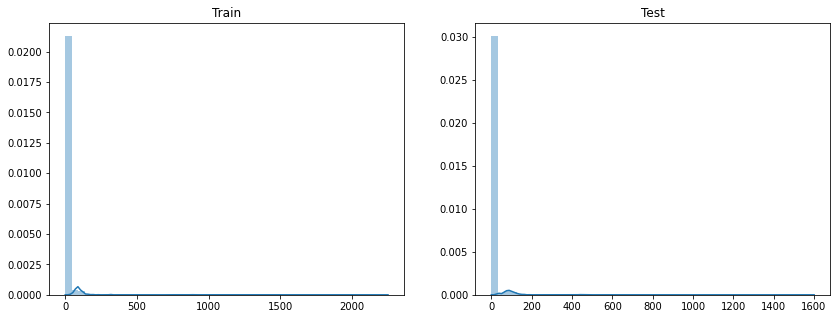

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["C6"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["C6"].values)
plt.title("Test")
plt.show()

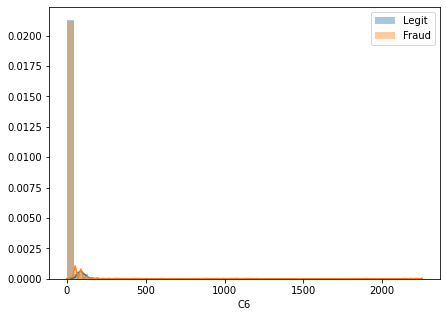

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["C6"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["C6"], label= "Fraud")
plt.legend()
plt.show()

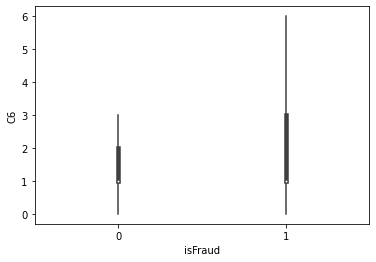

In [ ]:
sns.violinplot(x="isFraud", y="C6", data=data)
plt.show()

In [ ]:
quantile_c2 = data.C6.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of c6 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of c6 is 0.0
10th percentile value of c6 is 1.0
20th percentile value of c6 is 1.0
30th percentile value of c6 is 1.0
40th percentile value of c6 is 1.0
50th percentile value of c6 is 1.0
60th percentile value of c6 is 1.0
70th percentile value of c6 is 2.0
80th percentile value of c6 is 2.0
90th percentile value of c6 is 5.0
100th percentile value of c6 is 2252.0


In [ ]:
quantile_c2 = data.C6.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of c6 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of c6 is 5.0
92th percentile value of c6 is 6.0
93th percentile value of c6 is 7.0
94th percentile value of c6 is 9.0
95th percentile value of c6 is 15.0
96th percentile value of c6 is 55.0
97th percentile value of c6 is 79.0
98th percentile value of c6 is 94.0
99th percentile value of c6 is 118.0
100th percentile value of c6 is 2252.0


In [ ]:
quantile_c2 = data.C6.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of c6 is {}".format((i*100), quantile_c2[i]))

99.1 percentile value of c6 is 121.0
99.2 percentile value of c6 is 126.0
99.3 percentile value of c6 is 131.0
99.4 percentile value of c6 is 141.0
99.5 percentile value of c6 is 157.0
99.6 percentile value of c6 is 200.87199999997392
99.7 percentile value of c6 is 560.4039999999804
99.8 percentile value of c6 is 877.0
99.9 percentile value of c6 is 1138.46800000011
100.0 percentile value of c6 is 2252.0


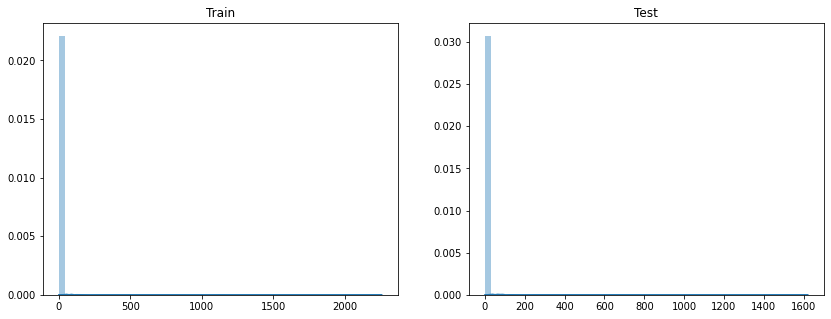

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["C7"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["C7"].values)
plt.title("Test")
plt.show()

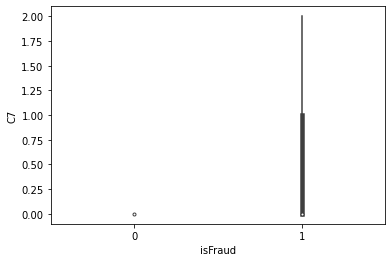

In [ ]:
sns.violinplot(x="isFraud", y="C7", data=data)
plt.show()

This plot shows that this feature will be less important while training model to seperate the fraudulent transactions from legit transactions because the percentage of points belonging to legit transactions are very less in train data.

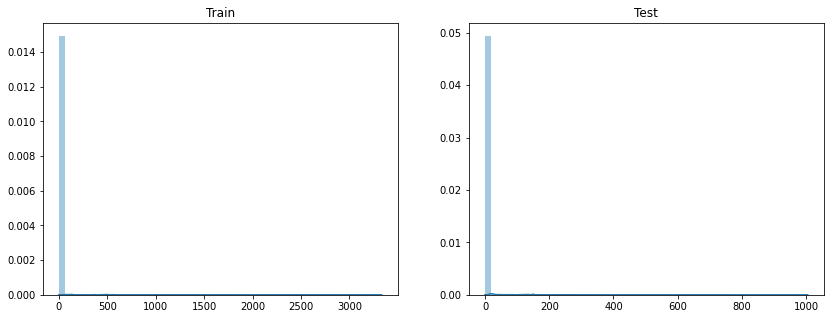

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["C8"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["C8"].values)
plt.title("Test")
plt.show()

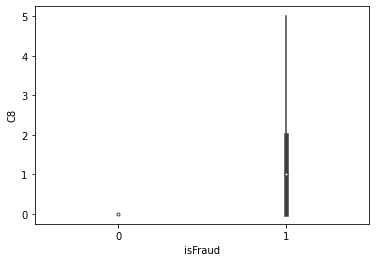

In [ ]:
sns.violinplot(x="isFraud", y="C8", data=data)
plt.show()

In [ ]:
quantile_c2 = data.C8.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of c8 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of c8 is 0.0
10th percentile value of c8 is 0.0
20th percentile value of c8 is 0.0
30th percentile value of c8 is 0.0
40th percentile value of c8 is 0.0
50th percentile value of c8 is 0.0
60th percentile value of c8 is 0.0
70th percentile value of c8 is 0.0
80th percentile value of c8 is 1.0
90th percentile value of c8 is 1.0
100th percentile value of c8 is 3332.0


In [ ]:
quantile_c2 = data.C8.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of c8 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of c8 is 1.0
92th percentile value of c8 is 1.0
93th percentile value of c8 is 1.0
94th percentile value of c8 is 2.0
95th percentile value of c8 is 2.0
96th percentile value of c8 is 2.0
97th percentile value of c8 is 3.0
98th percentile value of c8 is 6.0
99th percentile value of c8 is 11.0
100th percentile value of c8 is 3332.0


In [ ]:
quantile_c2 = data.C8.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of c8 is {}".format((i*100), quantile_c2[i]))

99.1 percentile value of c8 is 13.0
99.2 percentile value of c8 is 16.0
99.3 percentile value of c8 is 20.0
99.4 percentile value of c8 is 32.0
99.5 percentile value of c8 is 61.0
99.6 percentile value of c8 is 123.0
99.7 percentile value of c8 is 457.40399999998044
99.8 percentile value of c8 is 569.0
99.9 percentile value of c8 is 1697.0
100.0 percentile value of c8 is 3332.0


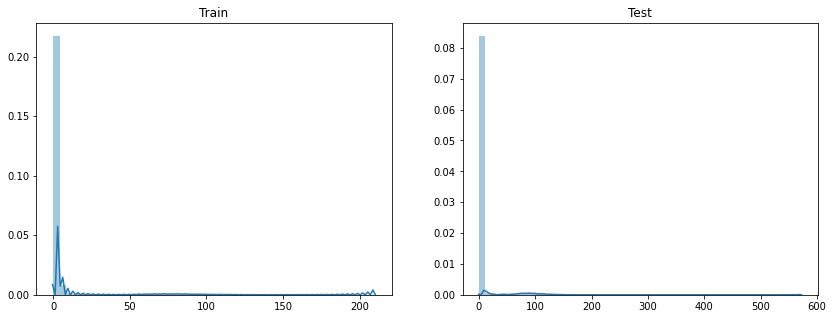

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["C9"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["C9"].values)
plt.title("Test")
plt.show()

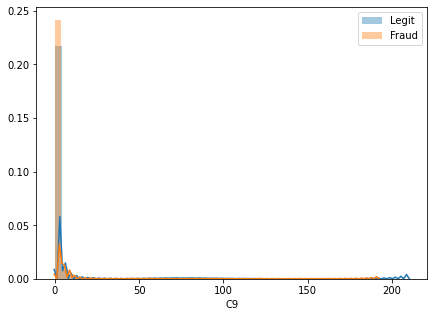

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["C9"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["C9"], label= "Fraud")
plt.legend()
plt.show()

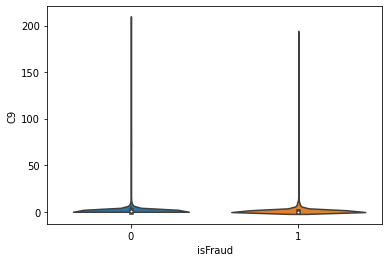

In [ ]:
sns.violinplot(x="isFraud", y="C9", data=data)
plt.show()

In [ ]:
quantile_c2 = data.C9.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of c9 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of c9 is 0.0
10th percentile value of c9 is 0.0
20th percentile value of c9 is 0.0
30th percentile value of c9 is 0.0
40th percentile value of c9 is 1.0
50th percentile value of c9 is 1.0
60th percentile value of c9 is 1.0
70th percentile value of c9 is 2.0
80th percentile value of c9 is 2.0
90th percentile value of c9 is 4.0
100th percentile value of c9 is 210.0


In [ ]:
quantile_c2 = data.C9.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of c9 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of c9 is 4.0
92th percentile value of c9 is 5.0
93th percentile value of c9 is 6.0
94th percentile value of c9 is 7.0
95th percentile value of c9 is 9.0
96th percentile value of c9 is 19.0
97th percentile value of c9 is 63.0
98th percentile value of c9 is 78.0
99th percentile value of c9 is 95.0
100th percentile value of c9 is 210.0


In [ ]:
quantile_c2 = data.C9.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of c9 is {}".format((i*100), quantile_c2[i]))

99.1 percentile value of c9 is 98.0
99.2 percentile value of c9 is 100.0
99.3 percentile value of c9 is 103.0
99.4 percentile value of c9 is 107.0
99.5 percentile value of c9 is 111.0
99.6 percentile value of c9 is 115.0
99.7 percentile value of c9 is 121.0
99.8 percentile value of c9 is 131.0
99.9 percentile value of c9 is 153.0
100.0 percentile value of c9 is 210.0


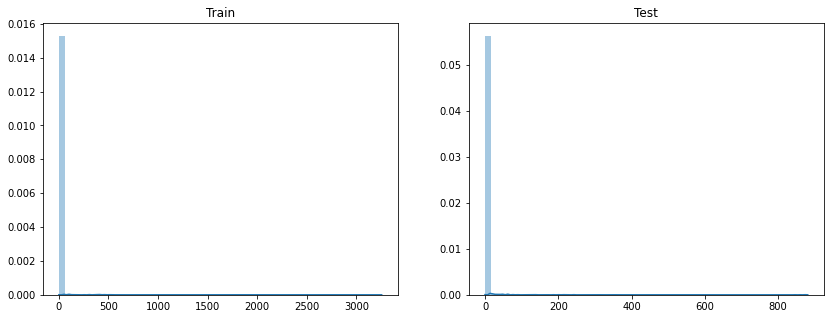

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["C10"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["C10"].values)
plt.title("Test")
plt.show()

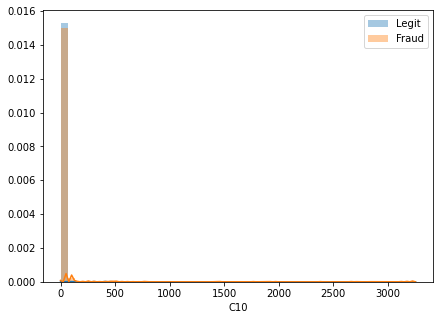

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["C10"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["C10"], label= "Fraud")
plt.legend()
plt.show()

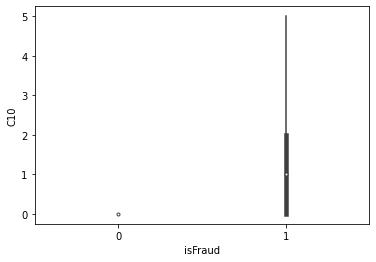

In [ ]:
sns.violinplot(x="isFraud", y="C10", data=data)
plt.show()

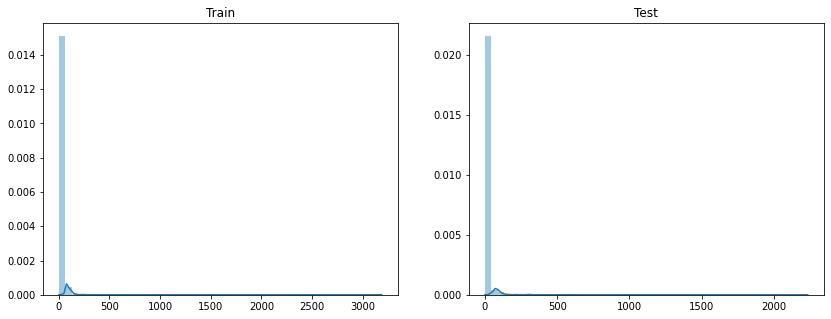

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["C11"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["C11"].values)
plt.title("Test")
plt.show()

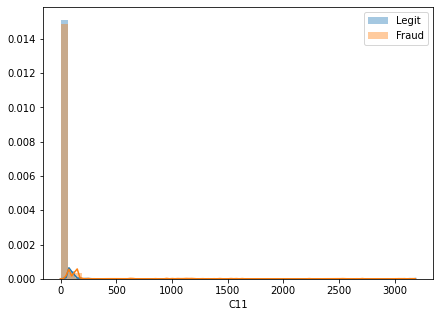

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["C11"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["C11"], label= "Fraud")
plt.legend()
plt.show()

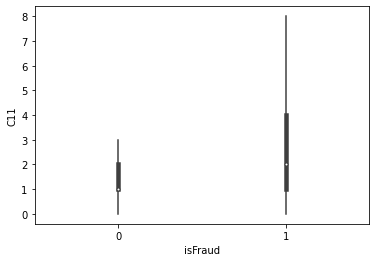

In [ ]:
sns.violinplot(x="isFraud", y="C11", data=data)
plt.show()

the values of the points belonging to fraud transactions are higher than legit transctions.

In [ ]:
quantile_c2 = data.C11.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of c11 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of c11 is 0.0
10th percentile value of c11 is 1.0
20th percentile value of c11 is 1.0
30th percentile value of c11 is 1.0
40th percentile value of c11 is 1.0
50th percentile value of c11 is 1.0
60th percentile value of c11 is 1.0
70th percentile value of c11 is 2.0
80th percentile value of c11 is 2.0
90th percentile value of c11 is 4.0
100th percentile value of c11 is 3188.0


In [ ]:
quantile_c2 = data.C11.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of c11 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of c11 is 5.0
92th percentile value of c11 is 6.0
93th percentile value of c11 is 7.0
94th percentile value of c11 is 9.0
95th percentile value of c11 is 14.0
96th percentile value of c11 is 55.0
97th percentile value of c11 is 77.0
98th percentile value of c11 is 94.0
99th percentile value of c11 is 122.0
100th percentile value of c11 is 3188.0


In [ ]:
quantile_c2 = data.C11.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of c11 is {}".format((i*100), quantile_c2[i]))

99.1 percentile value of c11 is 126.0
99.2 percentile value of c11 is 132.0
99.3 percentile value of c11 is 139.0
99.4 percentile value of c11 is 149.0
99.5 percentile value of c11 is 166.0
99.6 percentile value of c11 is 232.0
99.7 percentile value of c11 is 641.0
99.8 percentile value of c11 is 985.0
99.9 percentile value of c11 is 1526.46800000011
100.0 percentile value of c11 is 3188.0


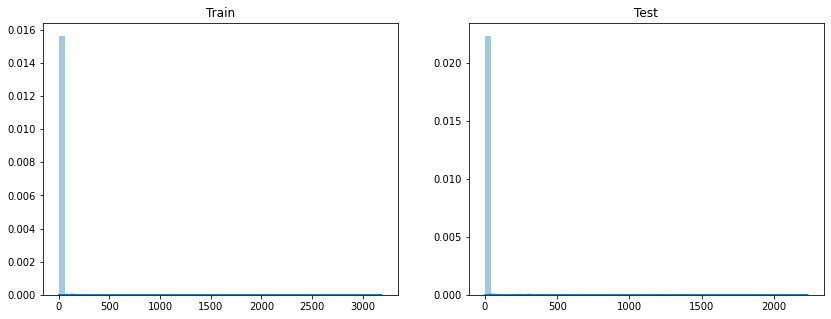

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["C12"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["C12"].values)
plt.title("Test")
plt.show()

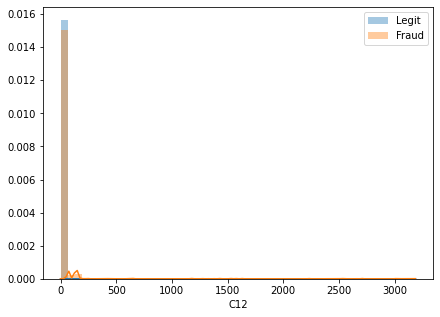

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["C12"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["C12"], label= "Fraud")
plt.legend()
plt.show()

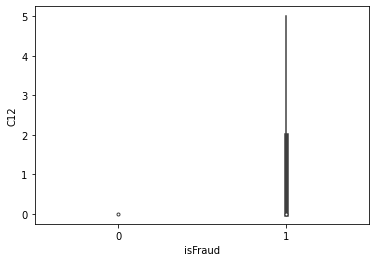

In [ ]:
sns.violinplot(x="isFraud", y="C12", data=data)
plt.show()

This plot shows that this feature will be less important while training model to seperate the fraudulent transactions from legit transactions because the percentage of points belonging to legit transactions are very less in train data.

In [ ]:
quantile_c2 = data.C12.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of c12 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of c12 is 0.0
10th percentile value of c12 is 0.0
20th percentile value of c12 is 0.0
30th percentile value of c12 is 0.0
40th percentile value of c12 is 0.0
50th percentile value of c12 is 0.0
60th percentile value of c12 is 0.0
70th percentile value of c12 is 0.0
80th percentile value of c12 is 0.0
90th percentile value of c12 is 1.0
100th percentile value of c12 is 3188.0


In [ ]:
quantile_c2 = data.C12.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of c12 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of c12 is 1.0
92th percentile value of c12 is 1.0
93th percentile value of c12 is 1.0
94th percentile value of c12 is 1.0
95th percentile value of c12 is 1.0
96th percentile value of c12 is 2.0
97th percentile value of c12 is 2.0
98th percentile value of c12 is 3.0
99th percentile value of c12 is 5.0
100th percentile value of c12 is 3188.0


In [ ]:
quantile_c2 = data.C12.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of c12 is {}".format((i*100), quantile_c2[i]))

99.1 percentile value of c12 is 6.0
99.2 percentile value of c12 is 7.0
99.3 percentile value of c12 is 9.0
99.4 percentile value of c12 is 13.0
99.5 percentile value of c12 is 22.0
99.6 percentile value of c12 is 45.0
99.7 percentile value of c12 is 130.40399999998044
99.8 percentile value of c12 is 503.93599999998696
99.9 percentile value of c12 is 1526.46800000011
100.0 percentile value of c12 is 3188.0


In [ ]:
quantile_c2 = test_data.C12.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of c12 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of c12 is 0.0
10th percentile value of c12 is 0.0
20th percentile value of c12 is 0.0
30th percentile value of c12 is 0.0
40th percentile value of c12 is 0.0
50th percentile value of c12 is 0.0
60th percentile value of c12 is 0.0
70th percentile value of c12 is 0.0
80th percentile value of c12 is 1.0
90th percentile value of c12 is 1.0
100th percentile value of c12 is 2234.0


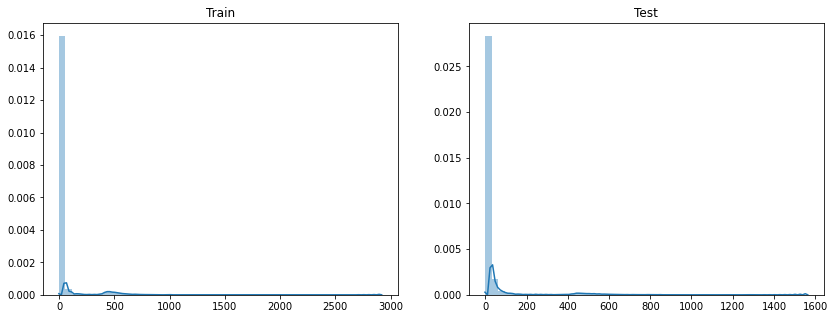

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["C13"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["C13"].values)
plt.title("Test")
plt.show()

The distrubution for train at near zero are very less

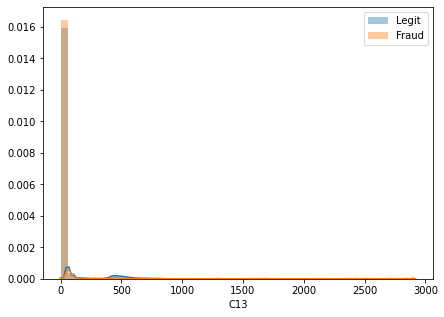

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["C13"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["C13"], label= "Fraud")
plt.legend()
plt.show()

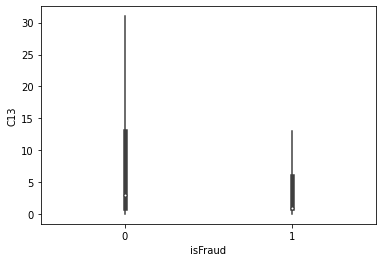

In [ ]:
sns.violinplot(x="isFraud", y="C13", data=data)
plt.show()

The values of points belongs to legit transaction are higher than fraud transaction.

In [ ]:
quantile_c2 = data.C13.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of c13 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of c13 is 0.0
10th percentile value of c13 is 1.0
20th percentile value of c13 is 1.0
30th percentile value of c13 is 1.0
40th percentile value of c13 is 2.0
50th percentile value of c13 is 3.0
60th percentile value of c13 is 5.0
70th percentile value of c13 is 9.0
80th percentile value of c13 is 17.0
90th percentile value of c13 is 37.0
100th percentile value of c13 is 2918.0


In [ ]:
quantile_c2 = data.C13.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of c13 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of c13 is 42.0
92th percentile value of c13 is 49.0
93th percentile value of c13 is 57.0
94th percentile value of c13 is 70.0
95th percentile value of c13 is 102.0
96th percentile value of c13 is 277.0
97th percentile value of c13 is 439.0
98th percentile value of c13 is 493.0
99th percentile value of c13 is 578.0
100th percentile value of c13 is 2918.0


In [ ]:
quantile_c2 = data.C13.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of c13 is {}".format((i*100), quantile_c2[i]))

99.1 percentile value of c13 is 593.0
99.2 percentile value of c13 is 608.0
99.3 percentile value of c13 is 627.0
99.4 percentile value of c13 is 651.0
99.5 percentile value of c13 is 684.0
99.6 percentile value of c13 is 719.0
99.7 percentile value of c13 is 779.0
99.8 percentile value of c13 is 873.0
99.9 percentile value of c13 is 1651.0
100.0 percentile value of c13 is 2918.0


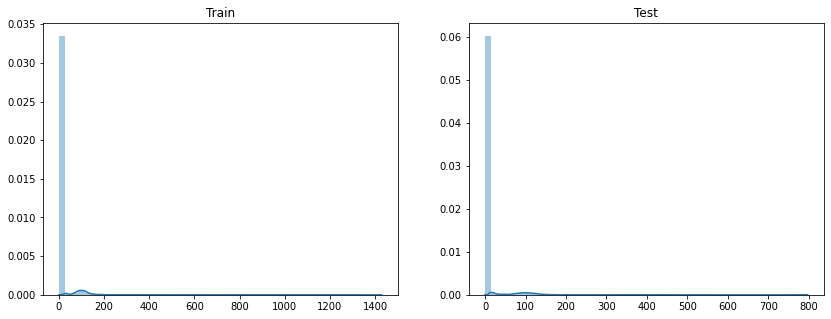

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["C14"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["C14"].values)
plt.title("Test")
plt.show()

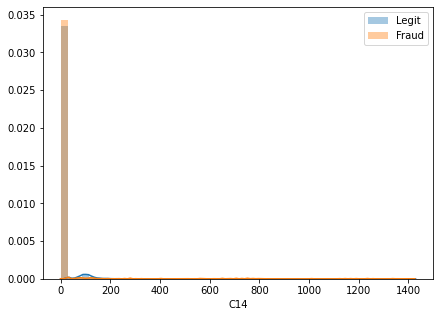

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["C14"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["C14"], label= "Fraud")
plt.legend()
plt.show()

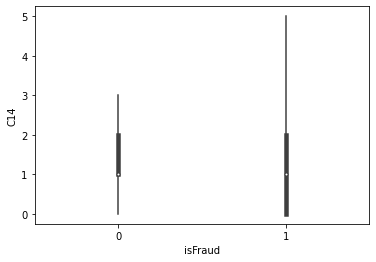

In [ ]:
sns.violinplot(x="isFraud", y="C14", data=data)
plt.show()

In [ ]:
quantile_c2 = data.C14.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of c14 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of c14 is 0.0
10th percentile value of c14 is 1.0
20th percentile value of c14 is 1.0
30th percentile value of c14 is 1.0
40th percentile value of c14 is 1.0
50th percentile value of c14 is 1.0
60th percentile value of c14 is 1.0
70th percentile value of c14 is 2.0
80th percentile value of c14 is 3.0
90th percentile value of c14 is 5.0
100th percentile value of c14 is 1429.0


In [ ]:
quantile_c2 = data.C14.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of c14 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of c14 is 6.0
92th percentile value of c14 is 6.0
93th percentile value of c14 is 8.0
94th percentile value of c14 is 9.0
95th percentile value of c14 is 14.0
96th percentile value of c14 is 53.0
97th percentile value of c14 is 88.0
98th percentile value of c14 is 106.0
99th percentile value of c14 is 128.0
100th percentile value of c14 is 1429.0


In [ ]:
quantile_c2 = data.C14.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of c14 is {}".format((i*100), quantile_c2[i]))

99.1 percentile value of c14 is 132.0
99.2 percentile value of c14 is 136.0
99.3 percentile value of c14 is 142.0
99.4 percentile value of c14 is 151.0
99.5 percentile value of c14 is 164.0
99.6 percentile value of c14 is 188.0
99.7 percentile value of c14 is 367.0
99.8 percentile value of c14 is 612.0
99.9 percentile value of c14 is 778.469000000041
100.0 percentile value of c14 is 1429.0


from the above feature analysis of C1 to C14 i have concluded that The distribution of most of the C features are very similar but in some features values of the distribution of one class points are higher than other class points.
Sp i concluded that some of these features are very important for classification but some other features are very less important because the percentage of points belongs to one class are very less than other class.


## **Analysis of D1 to D15 features :**

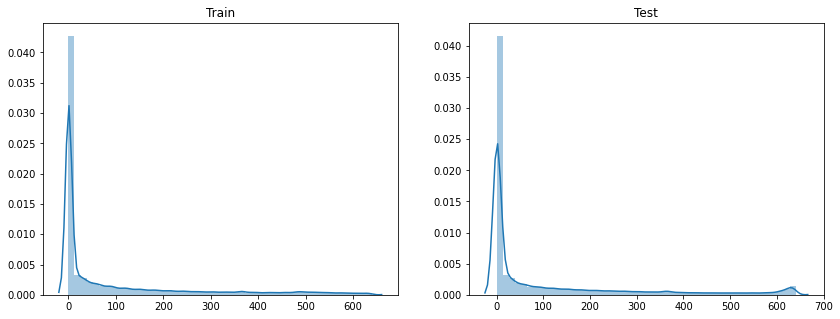

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["D1"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["D1"].values)
plt.title("Test")
plt.show()

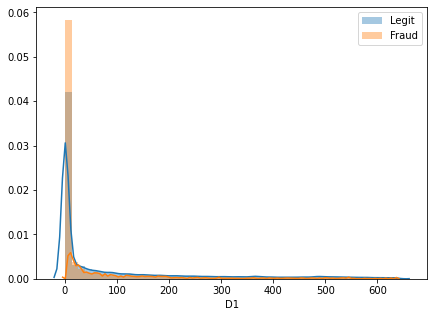

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["D1"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["D1"], label= "Fraud")
plt.legend()
plt.show()

points having less value of feature D1 are more likely to belong to the fraudulent transactions.

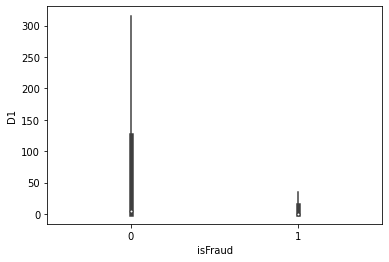

In [ ]:
sns.violinplot(x="isFraud", y="D1", data=data)
plt.show()

distribution of points belongs to legit transactions are ranging from 0 to 300 but distribution of points belonging to fraud transactions are ranging from 0 to approx 40. so higher values are belong to class legit.

In [ ]:
quantile_c2 = data.D1.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of D1 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of D1 is 0.0
10th percentile value of D1 is 0.0
20th percentile value of D1 is 0.0
30th percentile value of D1 is 0.0
40th percentile value of D1 is 0.0
50th percentile value of D1 is 3.0
60th percentile value of D1 is 29.0
70th percentile value of D1 is 81.0
80th percentile value of D1 is 179.0
90th percentile value of D1 is 364.0
100th percentile value of D1 is 640.0


In [ ]:
quantile_c2 = data.D1.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of D1 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of D1 is 385.0
92th percentile value of D1 is 412.0
93th percentile value of D1 is 440.0
94th percentile value of D1 is 467.0
95th percentile value of D1 is 489.0
96th percentile value of D1 is 512.0
97th percentile value of D1 is 536.0
98th percentile value of D1 is 566.0
99th percentile value of D1 is 602.0
100th percentile value of D1 is 640.0


In [ ]:
quantile_c2 = data.D1.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of D1 is {}".format((i*100), quantile_c2[i]))

99.1 percentile value of D1 is 605.0
99.2 percentile value of D1 is 608.0
99.3 percentile value of D1 is 612.0
99.4 percentile value of D1 is 616.0
99.5 percentile value of D1 is 621.0
99.6 percentile value of D1 is 625.0
99.7 percentile value of D1 is 630.0
99.8 percentile value of D1 is 633.0
99.9 percentile value of D1 is 636.0
100.0 percentile value of D1 is 640.0


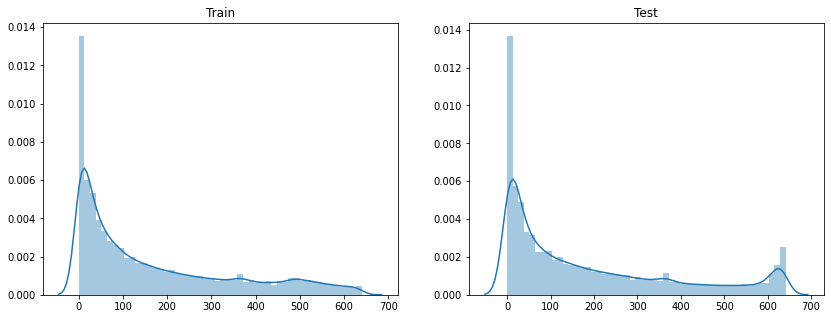

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["D2"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["D2"].values)
plt.title("Test")
plt.show()

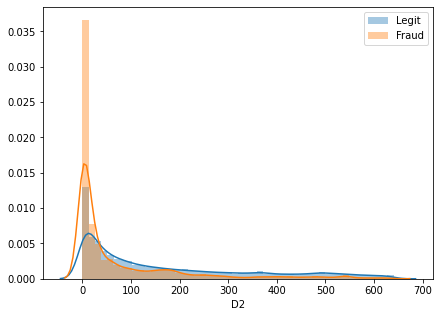

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["D2"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["D2"], label= "Fraud")
plt.legend()
plt.show()

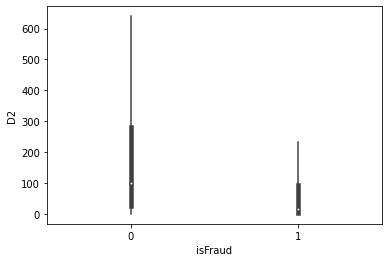

In [ ]:
sns.violinplot(x="isFraud", y="D2", data=data)
plt.show()

In [ ]:
quantile_c2 = data.D2.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of D2 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of D2 is 0.0
10th percentile value of D2 is 4.0
20th percentile value of D2 is 16.0
30th percentile value of D2 is 34.0
40th percentile value of D2 is 61.0
50th percentile value of D2 is 97.0
60th percentile value of D2 is 151.0
70th percentile value of D2 is 226.0
80th percentile value of D2 is 336.0
90th percentile value of D2 is 476.0
100th percentile value of D2 is 640.0


In [ ]:
quantile_c2 = data.D2.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of D2 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of D2 is 487.0
92th percentile value of D2 is 498.0
93th percentile value of D2 is 512.0
94th percentile value of D2 is 525.0
95th percentile value of D2 is 540.0
96th percentile value of D2 is 556.0
97th percentile value of D2 is 575.0
98th percentile value of D2 is 595.0
99th percentile value of D2 is 617.0
100th percentile value of D2 is 640.0


In [ ]:
quantile_c2 = data.D2.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of D2 is {}".format((i*100), quantile_c2[i]))

99.1 percentile value of D2 is 621.0
99.2 percentile value of D2 is 623.0
99.3 percentile value of D2 is 625.0
99.4 percentile value of D2 is 627.0
99.5 percentile value of D2 is 630.0
99.6 percentile value of D2 is 631.0
99.7 percentile value of D2 is 633.0
99.8 percentile value of D2 is 635.0
99.9 percentile value of D2 is 637.0
100.0 percentile value of D2 is 640.0


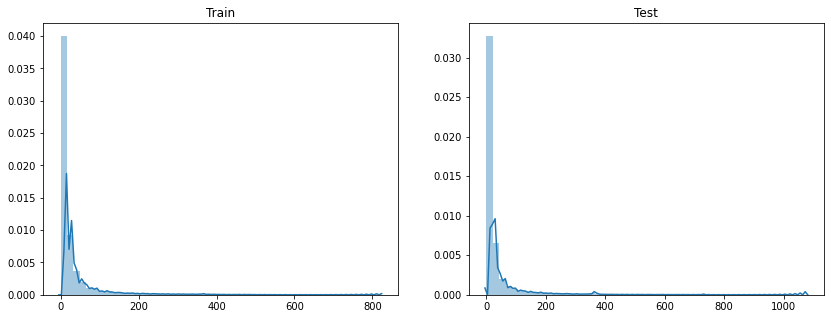

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["D3"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["D3"].values)
plt.title("Test")
plt.show()

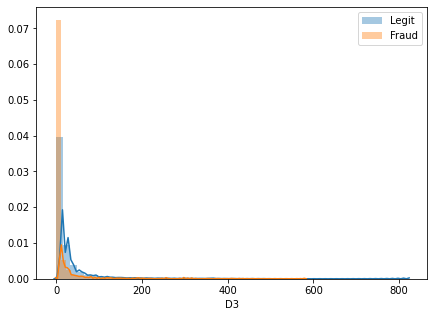

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["D3"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["D3"], label= "Fraud")
plt.legend()
plt.show()

This feature can calssifiy in some extent.

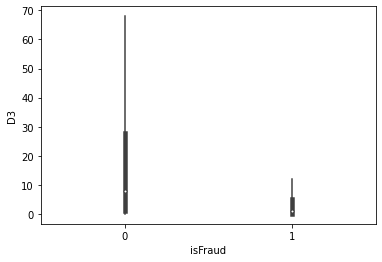

In [ ]:
sns.violinplot(x="isFraud", y="D3", data=data)
plt.show()

In [ ]:
quantile_c2 = data.D3.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of D3 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of D3 is 0.0
10th percentile value of D3 is 0.0
20th percentile value of D3 is 0.0
30th percentile value of D3 is 2.0
40th percentile value of D3 is 5.0
50th percentile value of D3 is 8.0
60th percentile value of D3 is 14.0
70th percentile value of D3 is 21.0
80th percentile value of D3 is 31.0
90th percentile value of D3 is 65.0
100th percentile value of D3 is 819.0


In [ ]:
quantile_c2 = data.D3.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of D3 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of D3 is 73.0
92th percentile value of D3 is 84.0
93th percentile value of D3 is 94.0
94th percentile value of D3 is 110.0
95th percentile value of D3 is 129.0
96th percentile value of D3 is 157.0
97th percentile value of D3 is 198.0
98th percentile value of D3 is 259.0
99th percentile value of D3 is 356.0
100th percentile value of D3 is 819.0


In [ ]:
quantile_c2 = data.D3.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of D3 is {}".format((i*100), quantile_c2[i]))

99.1 percentile value of D3 is 364.0
99.2 percentile value of D3 is 371.0
99.3 percentile value of D3 is 385.0
99.4 percentile value of D3 is 399.0
99.5 percentile value of D3 is 418.0
99.6 percentile value of D3 is 443.0
99.7 percentile value of D3 is 469.0
99.8 percentile value of D3 is 495.0
99.9 percentile value of D3 is 541.0
100.0 percentile value of D3 is 819.0


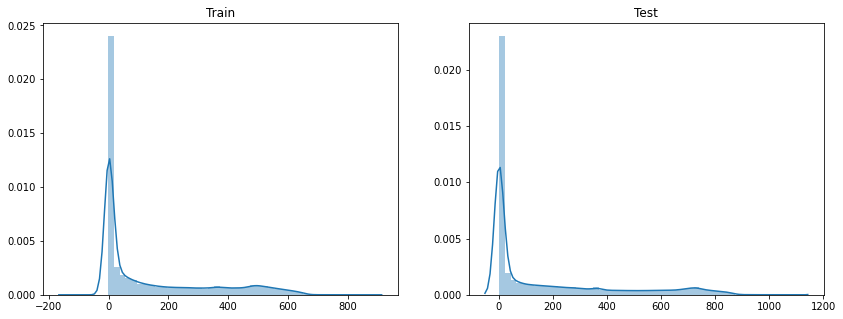

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["D4"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["D4"].values)
plt.title("Test")
plt.show()

some values of D4 are -ve which shows its erronous point, because D4 represent some time rreferences and it can't be negative.

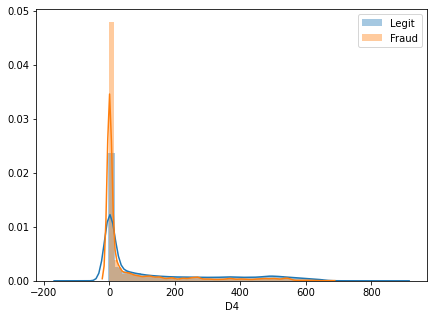

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["D4"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["D4"], label= "Fraud")
plt.legend()
plt.show()

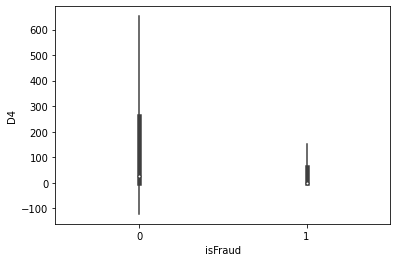

In [ ]:
sns.violinplot(x="isFraud", y="D4", data=data)
plt.show()

Since D feature represent some time reference hence it should not be -ve here some points belong to legit transactions are -ve 

In [ ]:
quantile_c2 = data.D4.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of D4 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of D4 is -122.0
10th percentile value of D4 is 0.0
20th percentile value of D4 is 0.0
30th percentile value of D4 is 0.0
40th percentile value of D4 is 1.0
50th percentile value of D4 is 26.0
60th percentile value of D4 is 80.0
70th percentile value of D4 is 182.0
80th percentile value of D4 is 333.0
90th percentile value of D4 is 482.0
100th percentile value of D4 is 869.0


In [ ]:
quantile_c2 = data.D4.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of D4 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of D4 is 492.0
92th percentile value of D4 is 504.0
93th percentile value of D4 is 516.0
94th percentile value of D4 is 529.0
95th percentile value of D4 is 544.0
96th percentile value of D4 is 559.0
97th percentile value of D4 is 577.0
98th percentile value of D4 is 598.0
99th percentile value of D4 is 623.0
100th percentile value of D4 is 869.0


Since Dx feature represent some timedelta , hence it can't be negative.

In [ ]:
data = data[(data["D4"]>=0.0) | (data["D4"].isnull())]
data.shape

(590518, 444)

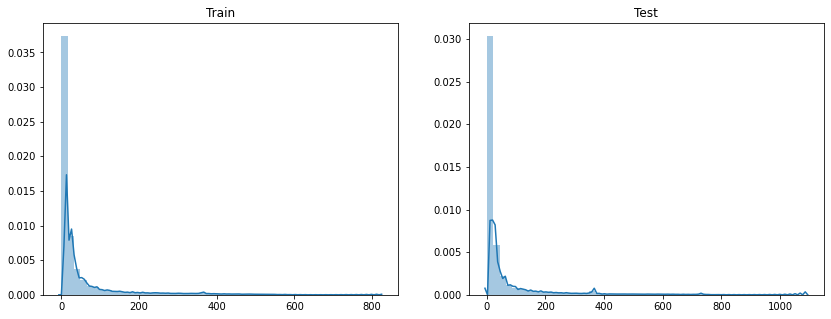

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["D5"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["D5"].values)
plt.title("Test")
plt.show()

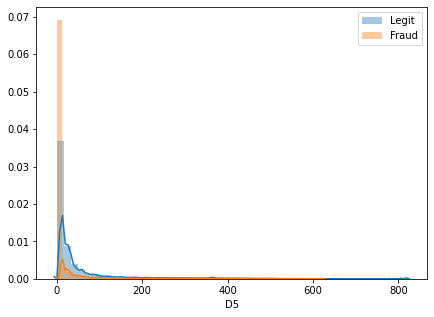

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["D5"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["D5"], label= "Fraud")
plt.legend()
plt.show()

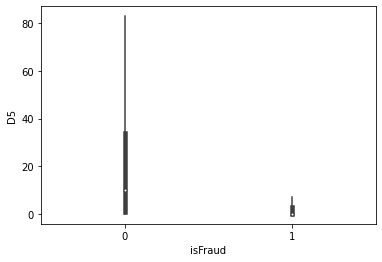

In [ ]:
sns.violinplot(x="isFraud", y="D5", data=data)
plt.show()

In [ ]:
quantile_c2 = data.D5.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of D5 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of D5 is 0.0
10th percentile value of D5 is 0.0
20th percentile value of D5 is 0.0
30th percentile value of D5 is 2.0
40th percentile value of D5 is 5.0
50th percentile value of D5 is 10.0
60th percentile value of D5 is 15.0
70th percentile value of D5 is 27.0
80th percentile value of D5 is 45.0
90th percentile value of D5 is 117.0
100th percentile value of D5 is 819.0


In [ ]:
quantile_c2 = data.D5.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of D5 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of D5 is 134.0
92th percentile value of D5 is 154.0
93th percentile value of D5 is 181.0
94th percentile value of D5 is 210.0
95th percentile value of D5 is 246.0
96th percentile value of D5 is 287.0
97th percentile value of D5 is 337.0
98th percentile value of D5 is 379.0
99th percentile value of D5 is 455.0
100th percentile value of D5 is 819.0


In [ ]:
quantile_c2 = data.D5.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of D5 is {}".format((i*100), quantile_c2[i]))

99.1 percentile value of D5 is 464.0
99.2 percentile value of D5 is 476.0
99.3 percentile value of D5 is 486.0
99.4 percentile value of D5 is 496.0
99.5 percentile value of D5 is 509.0
99.6 percentile value of D5 is 523.0
99.7 percentile value of D5 is 540.0
99.8 percentile value of D5 is 561.0
99.9 percentile value of D5 is 591.0
100.0 percentile value of D5 is 819.0


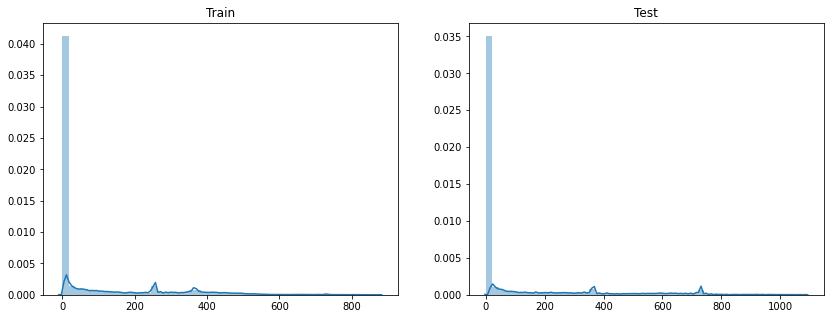

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["D6"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["D6"].values)
plt.title("Test")
plt.show()

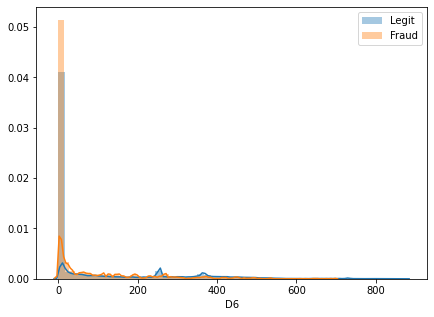

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["D6"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["D6"], label= "Fraud")
plt.legend()
plt.show()

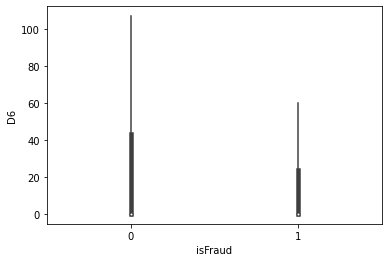

In [ ]:
sns.violinplot(x="isFraud", y="D6", data=data)
plt.show()

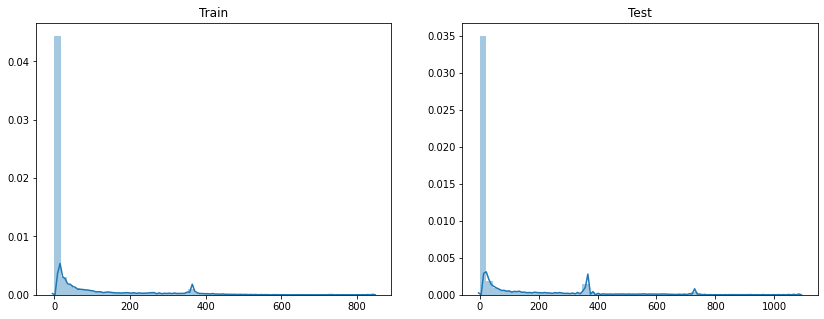

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["D7"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["D7"].values)
plt.title("Test")
plt.show()

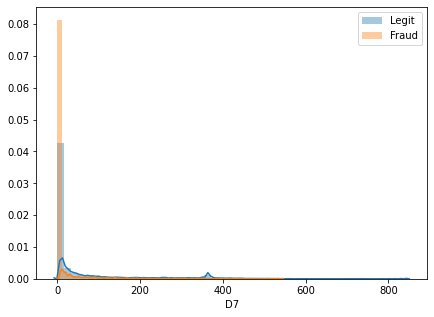

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["D7"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["D7"], label= "Fraud")
plt.legend()
plt.show()

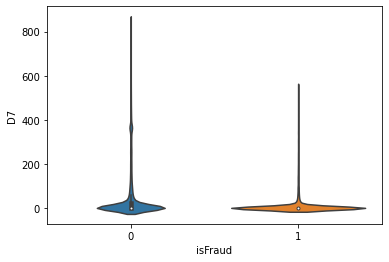

In [ ]:
sns.violinplot(x="isFraud", y="D7", data=data)
plt.show()

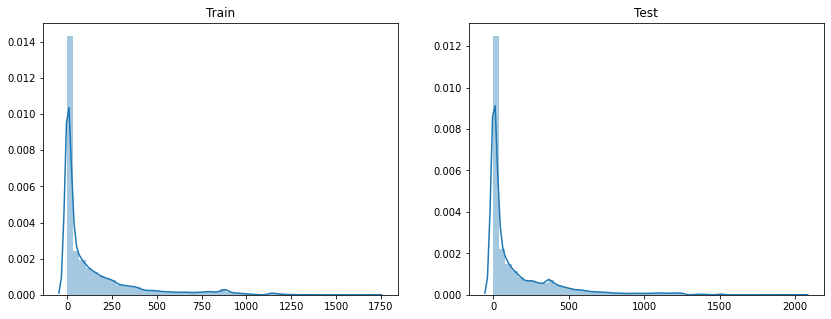

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["D8"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["D8"].values)
plt.title("Test")
plt.show()

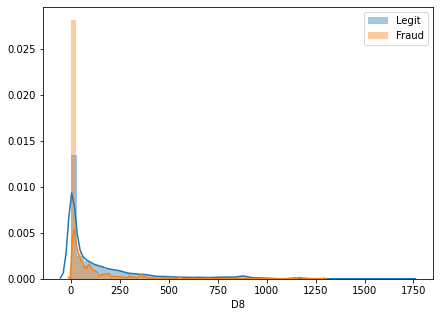

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["D8"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["D8"], label= "Fraud")
plt.legend()
plt.show()

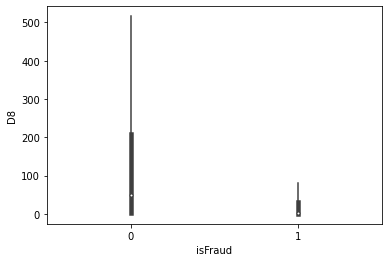

In [ ]:
sns.violinplot(x="isFraud", y="D8", data=data)
plt.show()

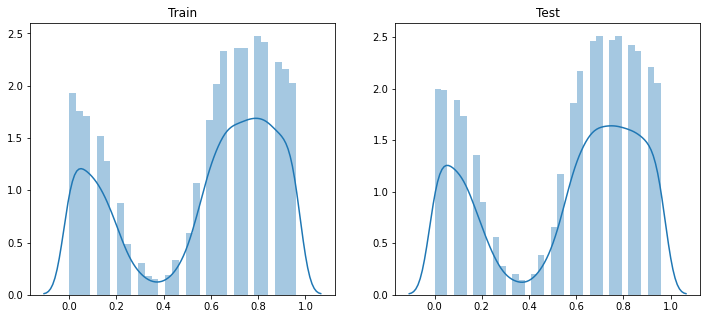

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data["D9"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data['D9'].values)
plt.title("Test")
plt.show()

D9 shows some discrit values distribution ranging from 0 to 1 and it shows periodic distribution.

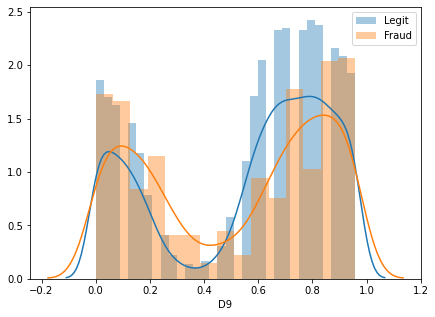

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["D9"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["D9"], label= "Fraud")
plt.legend()
plt.show()

for values 0.2, 0.6, 0.7, 0.8 are more likely to be legit transactions

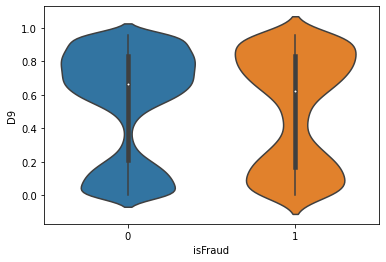

In [ ]:
sns.violinplot(x="isFraud", y="D9", data=data)
plt.show()

In [ ]:
quantile_c2 = data.D9.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of D5 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of D5 is 0.0
10th percentile value of D5 is 0.04166600108146668
20th percentile value of D5 is 0.125
30th percentile value of D5 is 0.4166660010814667
40th percentile value of D5 is 0.5833330154418945
50th percentile value of D5 is 0.6666659712791443
60th percentile value of D5 is 0.7083330154418945
70th percentile value of D5 is 0.7916659712791443
80th percentile value of D5 is 0.8333330154418945
90th percentile value of D5 is 0.9166659712791443
100th percentile value of D5 is 0.9583330154418944


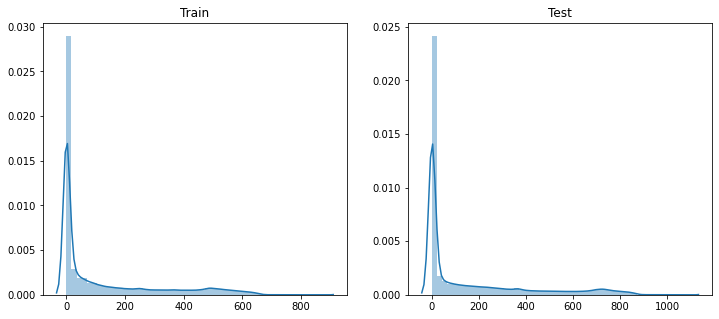

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data["D10"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data['D10'].values)
plt.title("Test")
plt.show()

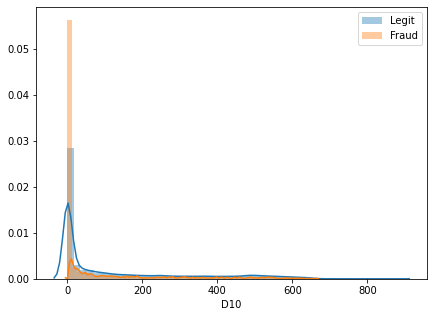

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["D10"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["D10"], label= "Fraud")
plt.legend()
plt.show()

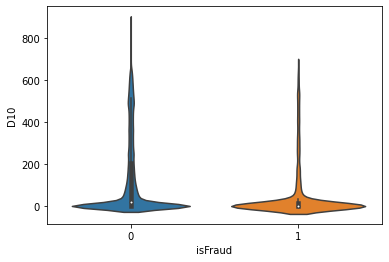

In [ ]:
sns.violinplot(x="isFraud", y="D10", data=data)
plt.show()

In [ ]:
quantile_c2 = data.D10.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of D10 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of D10 is 0.0
10th percentile value of D10 is 0.0
20th percentile value of D10 is 0.0
30th percentile value of D10 is 0.0
40th percentile value of D10 is 0.0
50th percentile value of D10 is 15.0
60th percentile value of D10 is 57.0
70th percentile value of D10 is 135.0
80th percentile value of D10 is 273.0
90th percentile value of D10 is 461.0
100th percentile value of D10 is 876.0


In [ ]:
quantile_c2 = data.D10.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of D10 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of D10 is 478.0
92th percentile value of D10 is 490.0
93th percentile value of D10 is 504.0
94th percentile value of D10 is 518.0
95th percentile value of D10 is 535.0
96th percentile value of D10 is 552.0
97th percentile value of D10 is 573.0
98th percentile value of D10 is 595.0
99th percentile value of D10 is 622.0
100th percentile value of D10 is 876.0


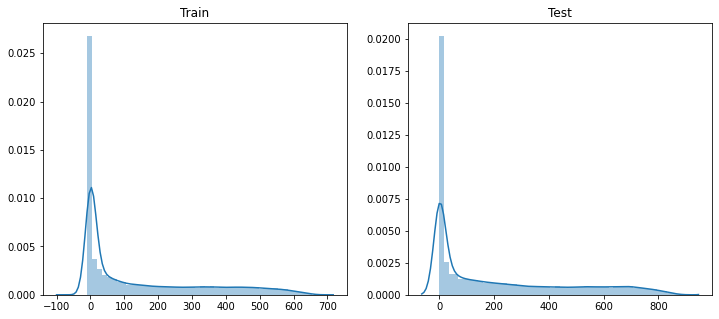

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data["D11"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data['D11'].values)
plt.title("Test")
plt.show()

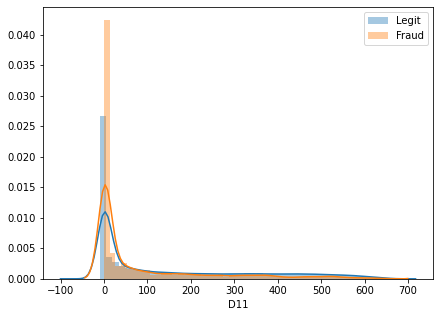

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["D11"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["D11"], label= "Fraud")
plt.legend()
plt.show()

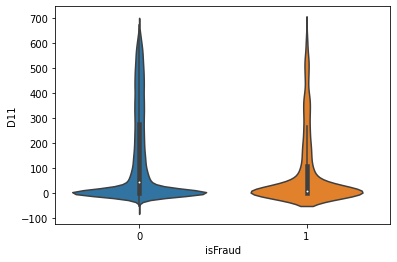

In [ ]:
sns.violinplot(x="isFraud", y="D11", data=data)
plt.show()

In [ ]:
quantile_c2 = data.D11.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of D11 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of D11 is -53.0
10th percentile value of D11 is 0.0
20th percentile value of D11 is 0.0
30th percentile value of D11 is 0.0
40th percentile value of D11 is 7.0
50th percentile value of D11 is 43.0
60th percentile value of D11 is 109.0
70th percentile value of D11 is 212.0
80th percentile value of D11 is 336.0
90th percentile value of D11 is 462.0
100th percentile value of D11 is 670.0


In [ ]:
quantile_c2 = data.D11.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of D11 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of D11 is 476.0
92th percentile value of D11 is 489.0
93th percentile value of D11 is 503.0
94th percentile value of D11 is 517.0
95th percentile value of D11 is 532.0
96th percentile value of D11 is 548.0
97th percentile value of D11 is 566.0
98th percentile value of D11 is 585.0
99th percentile value of D11 is 609.0
100th percentile value of D11 is 670.0


In [ ]:
data = data[(data["D11"]>=0.0) | (data["D11"].isnull())]
data.shape

(590513, 444)

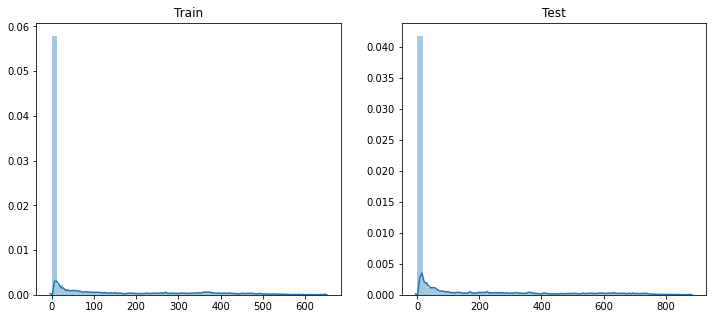

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data["D12"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data['D12'].values)
plt.title("Test")
plt.show()

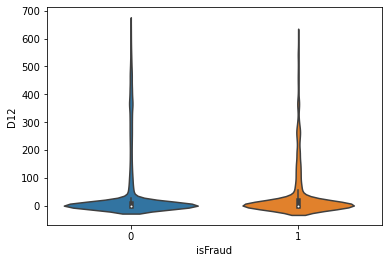

In [ ]:
sns.violinplot(x="isFraud", y="D12", data=data)
plt.show()

In [ ]:
quantile_c2 = data.D12.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of D11 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of D11 is 0.0
10th percentile value of D11 is 0.0
20th percentile value of D11 is 0.0
30th percentile value of D11 is 0.0
40th percentile value of D11 is 0.0
50th percentile value of D11 is 0.0
60th percentile value of D11 is 0.0
70th percentile value of D11 is 3.0
80th percentile value of D11 is 45.0
90th percentile value of D11 is 258.0
100th percentile value of D11 is 648.0


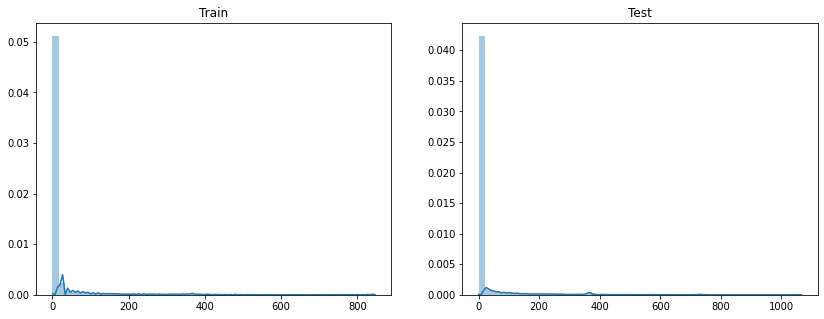

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["D13"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["D13"].values)
plt.title("Test")
plt.show()

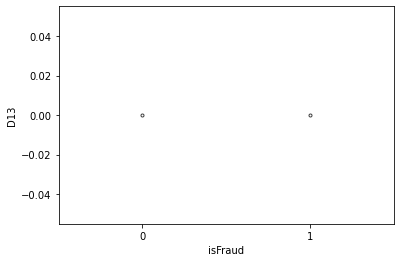

In [ ]:
sns.violinplot(x="isFraud", y="D13", data=data)
plt.show()

In [ ]:
quantile_c2 = data.D13.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of D11 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of D11 is 0.0
10th percentile value of D11 is 0.0
20th percentile value of D11 is 0.0
30th percentile value of D11 is 0.0
40th percentile value of D11 is 0.0
50th percentile value of D11 is 0.0
60th percentile value of D11 is 0.0
70th percentile value of D11 is 0.0
80th percentile value of D11 is 1.0
90th percentile value of D11 is 27.0
100th percentile value of D11 is 847.0


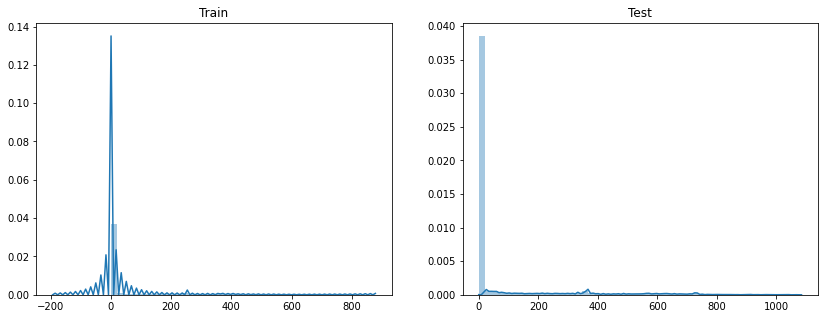

In [ ]:
 
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["D14"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["D14"].values)
plt.title("Test")
plt.show()

here near 0 the frequency of points are very high in comparision to corresponding points in test data, but in train data some negative points also present hence we have to rremove those points for which D14 is negative

In [ ]:
data = data[(data["D14"]>=0.0) | (data["D14"].isnull())]
data.shape

(590511, 444)

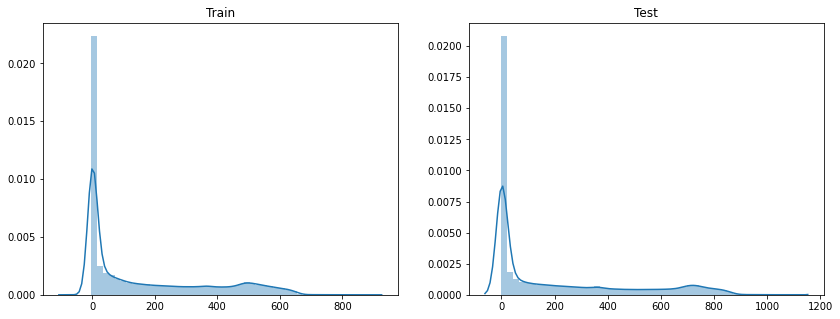

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(data["D15"].values)
plt.title("Train")
plt.subplot(1,2,2)
sns.distplot(test_data["D15"].values)
plt.title("Test")
plt.show()

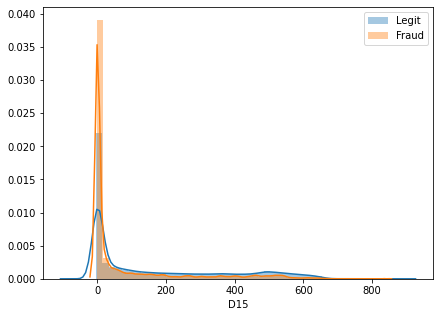

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(data[data["isFraud"]==0]["D15"], label="Legit")
sns.distplot(data[data["isFraud"]==1]["D15"], label= "Fraud")
plt.legend()
plt.show()

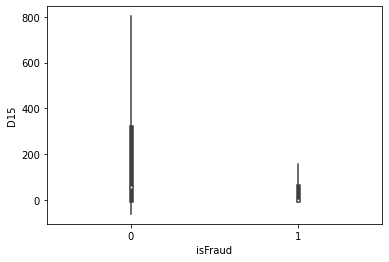

In [ ]:
sns.violinplot(x="isFraud", y="D15", data=data)
plt.show()

In [ ]:
quantile_c2 = data.D15.quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))

qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of D15 is {}".format(int(i*100), quantile_c2[i]))

0th percentile value of D15 is -60.0
10th percentile value of D15 is 0.0
20th percentile value of D15 is 0.0
30th percentile value of D15 is 0.0
40th percentile value of D15 is 10.0
50th percentile value of D15 is 52.0
60th percentile value of D15 is 127.0
70th percentile value of D15 is 244.0
80th percentile value of D15 is 384.0
90th percentile value of D15 is 509.0
100th percentile value of D15 is 879.0


In [ ]:
quantile_c2 = data.D15.quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))

qValues = np.round(np.arange(0.91, 1.01, 0.01), 4)
for i in qValues:
    print("{}th percentile value of D15 is {}".format(int(i*100), quantile_c2[i]))

91th percentile value of D15 is 518.0
92th percentile value of D15 is 529.0
93th percentile value of D15 is 541.0
94th percentile value of D15 is 552.0
95th percentile value of D15 is 566.0
96th percentile value of D15 is 579.0
97th percentile value of D15 is 596.0
98th percentile value of D15 is 613.0
99th percentile value of D15 is 635.0
100th percentile value of D15 is 879.0


In [ ]:
data = data[(data["D15"]>=0.0) | (data["D15"].isnull())]
data.shape

(590506, 444)

The main conclusion that i got from analysis of D_x features that its distribution of most features are very similar for train and test data and for some features the frequency of some points are very high in train data than corresponding points in test data and some D features contain -ve values therefore i removed that points 

## **Analysis of M1 to M9 features :**

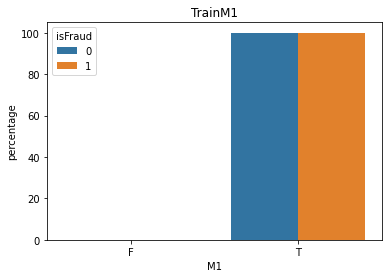

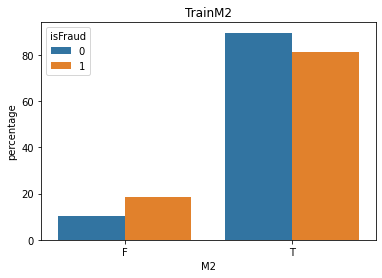

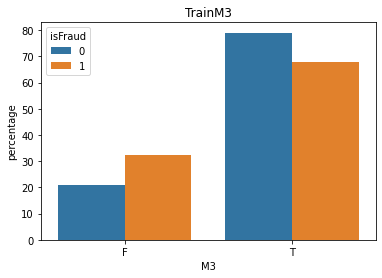

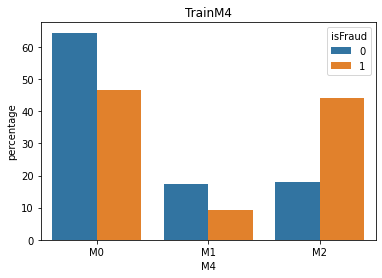

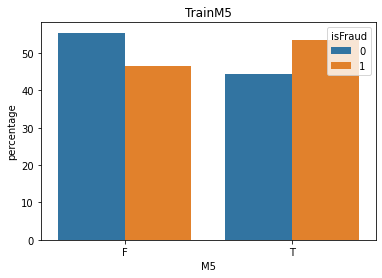

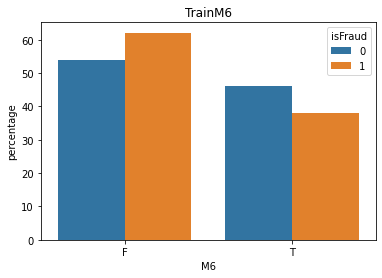

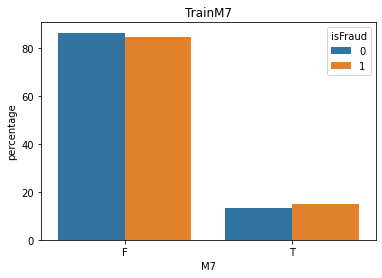

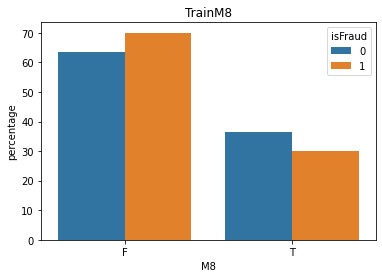

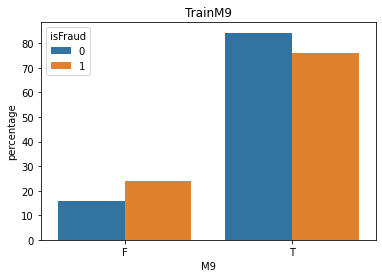

In [ ]:
for i in range(1,10):
   m = data.groupby(['isFraud'])['M'+str(i)].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('M'+str(i))
   sns.barplot(x="M"+str(i), y="percentage", hue="isFraud", data=m)
   plt.title('TrainM'+str(i)) 
   plt.show()                

**Feature M1 is useless beacause it doesn't contribute in classification.**

The observations that i got from the analysis of Mx features are all the features are categorical features in some features the more points belong to one class for ane distinct category so except M1 all the Mx features are very important in classification.

In [ ]:
data.drop(["M1"], axis=1, inplace=True)
test_data.drop(["M1"], axis=1, inplace=True)

##**Analysis of DeviceInfo feature :**

In [104]:
data["DeviceInfo"].value_counts()

Windows                    47721
iOS Device                 19781
MacOS                      12573
Trident/7.0                 7440
rv:11.0                     1901
                           ...  
2PQ93                          1
LG-D320                        1
F5321 Build/34.2.A.2.47        1
Alcatel_5056O                  1
LG-F400K                       1
Name: DeviceInfo, Length: 1786, dtype: int64

In [107]:
import gc
# Maping each device to their corresponding brand.
def device_to_brand(dataframe):
    dataframe['device_name'] = dataframe['DeviceInfo'].str.split('/', expand=True)[0]
    dataframe['device_version'] = dataframe['DeviceInfo'].str.split('/', expand=True)[1]

    dataframe.loc[dataframe['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
    dataframe.loc[dataframe['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
    dataframe.loc[dataframe['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
    dataframe.loc[dataframe['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
    dataframe.loc[dataframe['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
    dataframe.loc[dataframe['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
    dataframe.loc[dataframe['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
    dataframe.loc[dataframe['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'

    dataframe.loc[dataframe.device_name.isin(dataframe.device_name.value_counts()[dataframe.device_name.value_counts() < 200].index), 'device_name'] = "Others"
    gc.collect()
    
    return dataframe

In [108]:
data = device_to_brand(data)
test_data = device_to_brand(test_data)

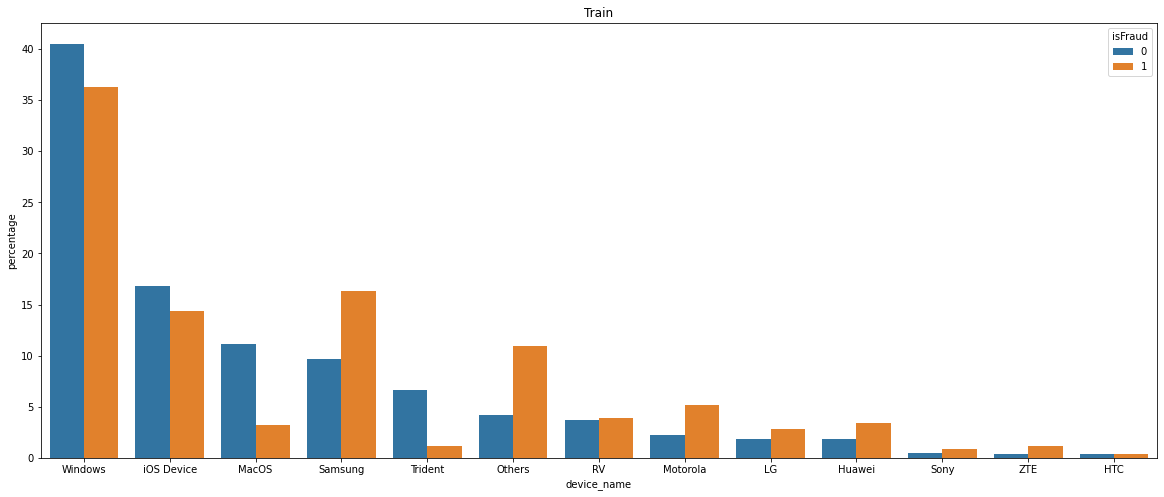

In [110]:
plt.figure(figsize=(20,8))
DeviceTypetrain = data.groupby(['isFraud'])['device_name'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
sns.barplot(x="device_name", y="percentage", hue="isFraud", data=DeviceTypetrain)
plt.title('Train')
 
plt.show()

It shows that device_name is useful feature for classification of fraud transactions from legit transactions.

## **DeviceType :**

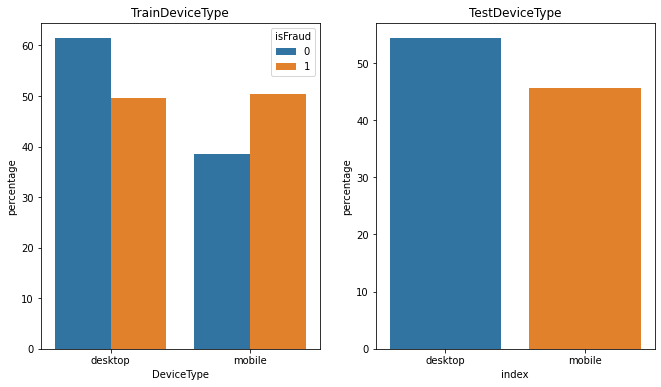

In [ ]:
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
DeviceTypetrain = data.groupby(['isFraud'])['DeviceType'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('DeviceType')
sns.barplot(x="DeviceType", y="percentage", hue="isFraud", data=DeviceTypetrain)
plt.title('TrainDeviceType')
plt.subplot(1,2,2)
DeviceTypeTest =test_data['DeviceType'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="index", y="percentage", data=DeviceTypeTest)
plt.title('TestDeviceType')
plt.show()

**transactions by mobile devices are more fraudulent.**

## **Analysis of some id_x features :**

In [74]:
data["id_30"].value_counts()

Windows 10          21155
Windows 7           13110
iOS 11.2.1           3722
iOS 11.1.2           3699
Android 7.0          2871
                    ...  
func                   10
iOS 11.4.0              5
Mac OS X 10_13_5        4
Windows                 3
iOS 11.4.1              1
Name: id_30, Length: 75, dtype: int64

In [79]:
def os_to_counts(value):
  if pd.isnull(value):
    return value
  else:
    return(str(value).split(" ")[0])

In [80]:
data["os_counts"] = data["id_30"].apply(os_to_counts)

In [81]:
data["os_counts"].value_counts()

Windows    36739
iOS        19781
Mac        13580
Android     6303
Linux       1136
other         15
func          10
Name: os_counts, dtype: int64

In [82]:
test_data["os_counts"] = test_data["id-30"].apply(os_to_counts)

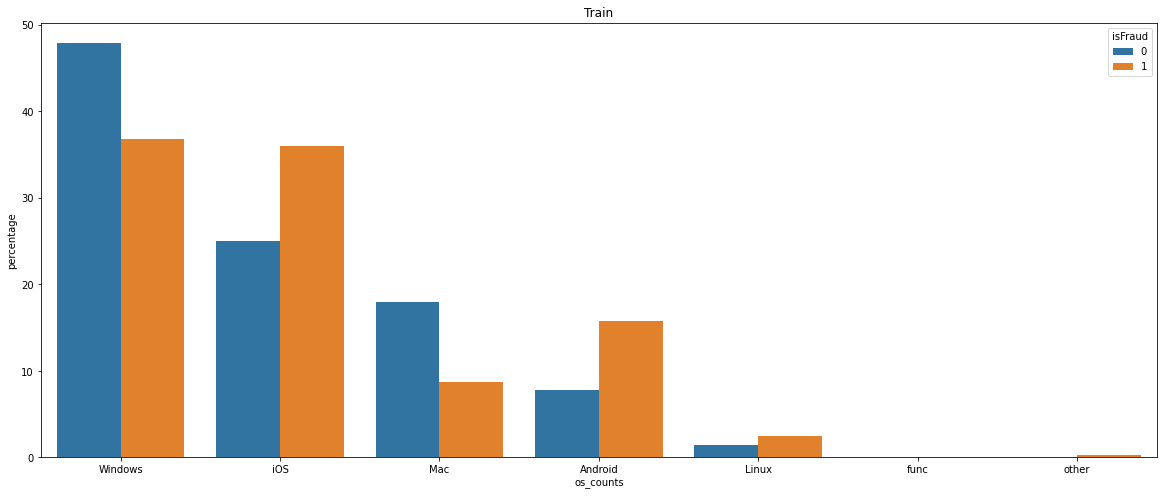

In [83]:
plt.figure(figsize=(20,8))
DeviceTypetrain = data.groupby(['isFraud'])['os_counts'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
sns.barplot(x="os_counts", y="percentage", hue="isFraud", data=DeviceTypetrain)
plt.title('Train')
 
plt.show()

os_counts feature is useful in classificatin of fraudulent and legit transaction. because it has some power of separability.

In [ ]:
data["id_31"].value_counts()

chrome 63.0              22000
mobile safari 11.0       13423
mobile safari generic    11473
ie 11.0 for desktop       9030
safari generic            8195
                         ...  
M4Tel/M4                     1
firefox mobile 61.0          1
android                      1
chrome 69.0                  1
BLU/Dash                     1
Name: id_31, Length: 130, dtype: int64

In [ ]:
test_data["id-31"].value_counts()

chrome 70.0                       16054
mobile safari 12.0                13098
mobile safari 11.0                10232
chrome 71.0                        9489
chrome 69.0                        8293
                                  ...  
google search application 49.0        4
palemoon                              2
opera 51.0                            1
blackberry                            1
rim                                   1
Name: id-31, Length: 135, dtype: int64

In [84]:
# it create two feature one is browser type and second is version of browser.
def id31_split(dataframe):
    dataframe['browser_id_31'] = dataframe['id_31'].str.split(' ', expand=True)[0]
    dataframe['version_id_31'] = dataframe['id_31'].str.split(' ', expand=True)[1]
id31_split(data)    

In [85]:
def id31_split(dataframe):
    dataframe['browser_id_31'] = dataframe['id-31'].str.split(' ', expand=True)[0]
    dataframe['version_id_31'] = dataframe['id-31'].str.split(' ', expand=True)[1]
id31_split(test_data) 

In [87]:
data["id_33"].value_counts()

1920x1080    16874
1366x768      8605
1334x750      6447
2208x1242     4900
1440x900      4384
             ...  
2048x1278        1
2816x1760        1
3360x1050        1
2160x1350        1
4200x2625        1
Name: id_33, Length: 260, dtype: int64

In [88]:
# create two feature one for screen length and second for screen width.
def split_heightNwidth(dataframe):
    dataframe['screen_width'] = dataframe['id_33'].str.split('x', expand=True)[0]
    dataframe['screen_height'] = dataframe['id_33'].str.split('x', expand=True)[1]
split_heightNwidth(data)    

In [89]:
def split_heightNwidth(dataframe):
    dataframe['screen_width'] = dataframe['id-33'].str.split('x', expand=True)[0]
    dataframe['screen_height'] = dataframe['id-33'].str.split('x', expand=True)[1]
split_heightNwidth(test_data)    

In [91]:
# This function return the number of digits after decimal point in TransactionAmt.
def afterDecimalCount(amt):
    amt = str(amt)
    return len(amt.split(".")[1])

data['TransDecimalCount'] = data['TransactionAmt'].apply(afterDecimalCount)
test_data['TransDecimalCount'] = test_data['TransactionAmt'].apply(afterDecimalCount)    

In [92]:
data.groupby(["isFraud"])["TransDecimalCount"].mean()

isFraud
0    2.215966
1    2.478511
Name: TransDecimalCount, dtype: float64

If Decimal amount is high than probability of it belongs to the fraud is high.

### **id_01 to id_11 are numerical features :**

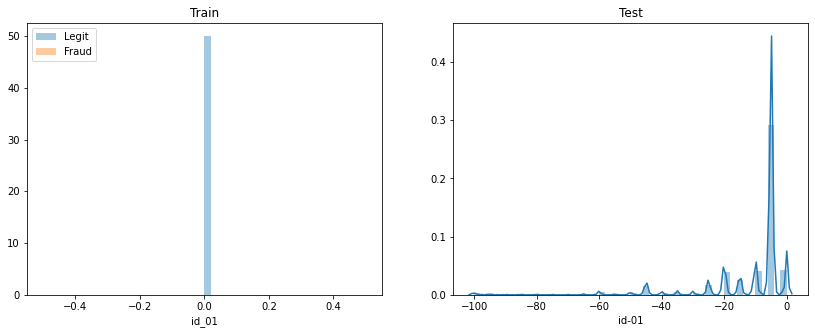

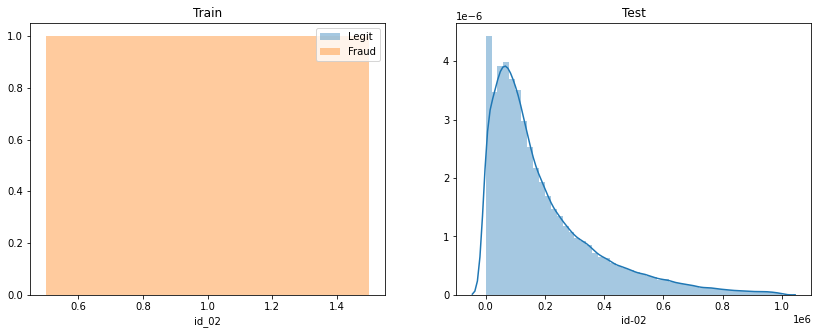

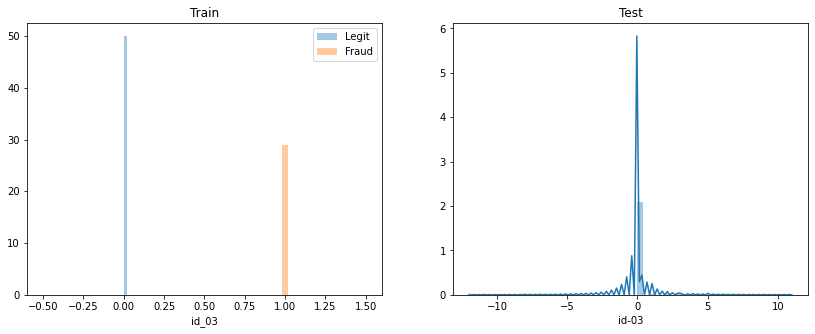

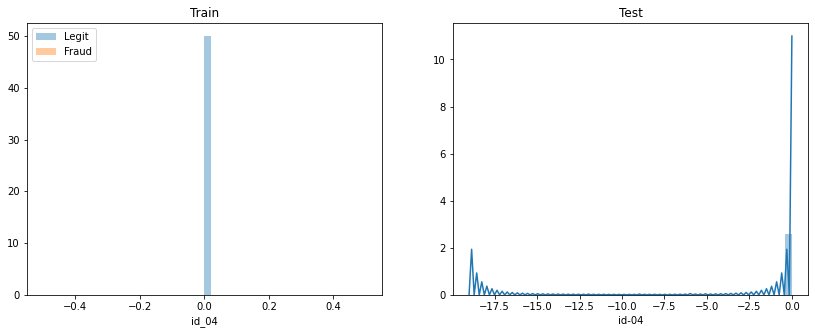

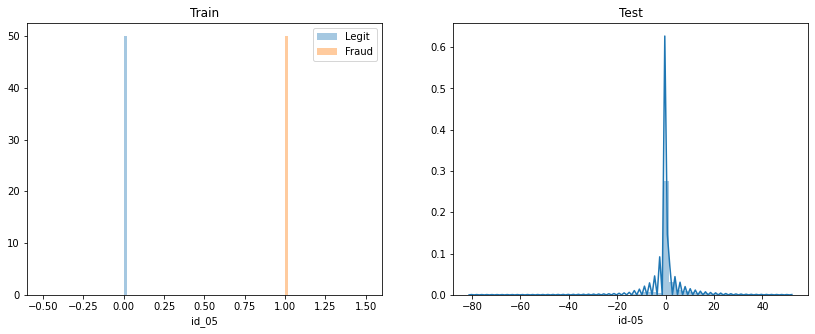

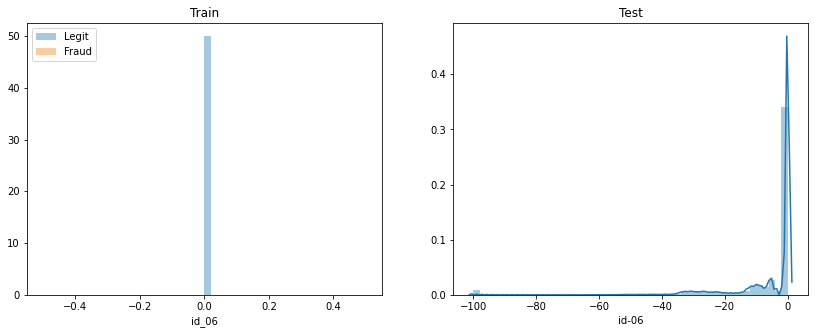

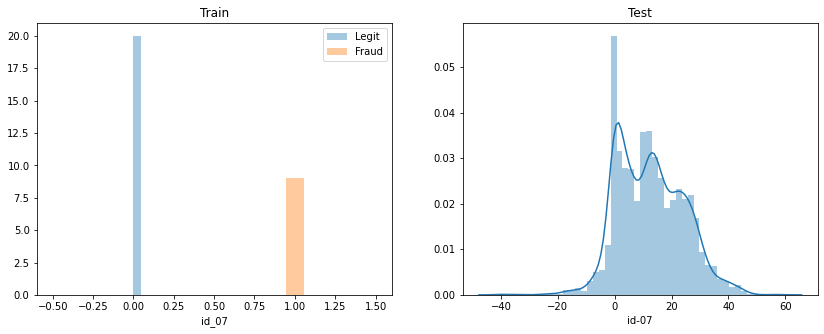

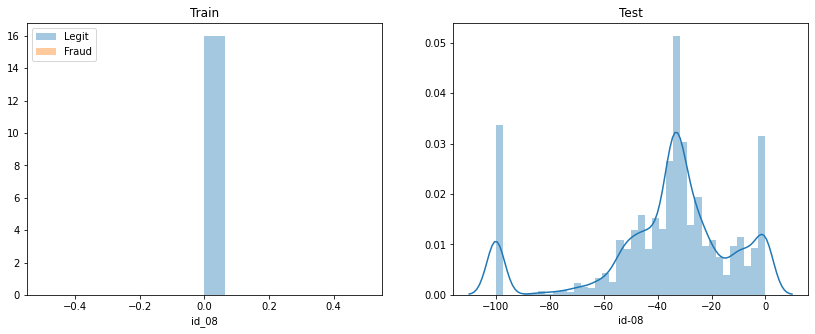

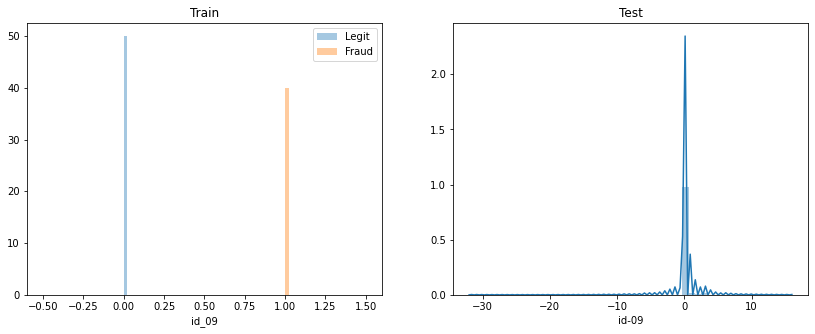

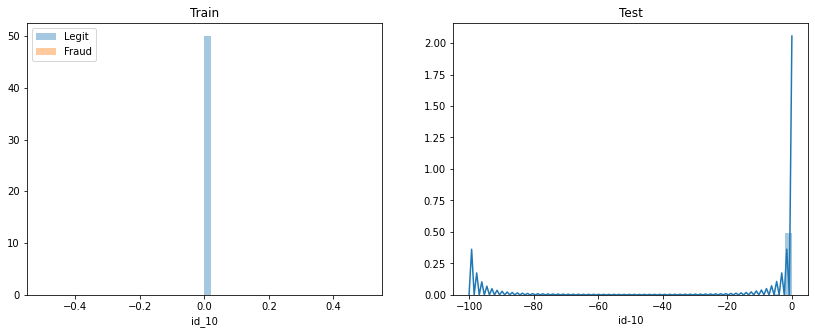

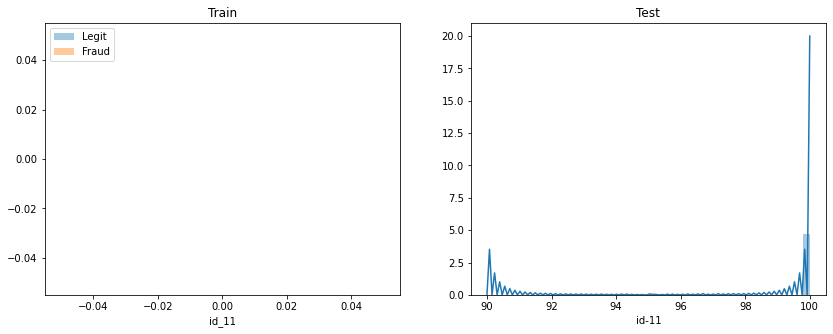

In [101]:
for i in ['01','02','03','04','05','06','07','08','09','10','11']:
   plt.figure(figsize=(14,5))
   plt.subplot(1,2,1)
   sns.distplot(data[data["id_"+i]==0]["id_"+i], label="Legit")
   sns.distplot(data[data["id_"+i]==1]["id_"+i], label="Fraud")
   plt.legend()
   plt.title("Train")
   plt.subplot(1,2,2)
   sns.distplot(test_data["id-"+i])
   plt.title("Test")
   plt.show()
   print("="*50)

We need to remove some id_x features because that would not takes part in the classification, they have only one class of values. 

### **id_12 to id_38 are categorical features :**

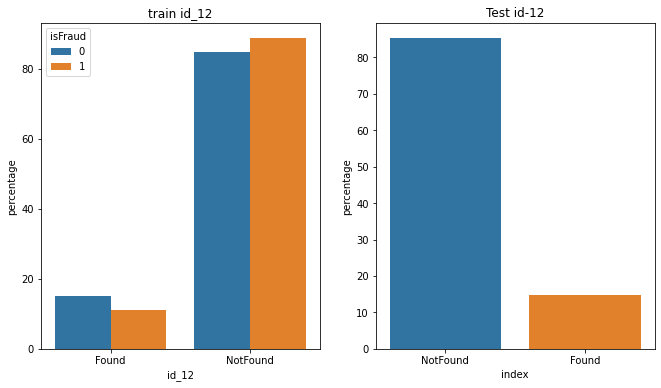

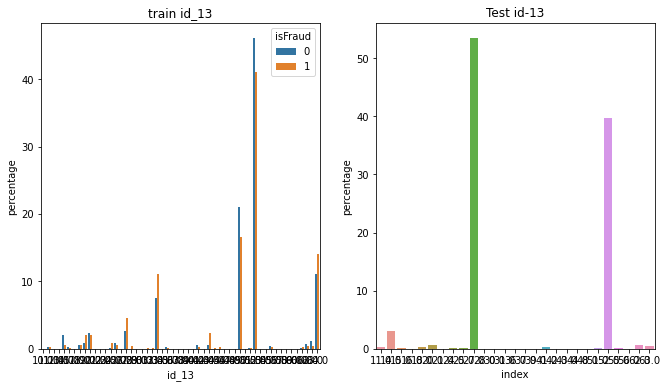

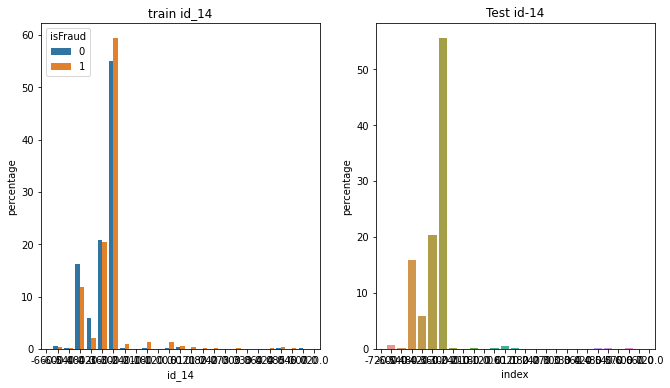

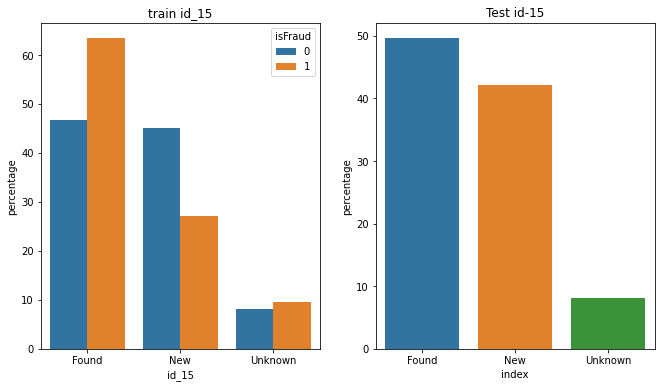

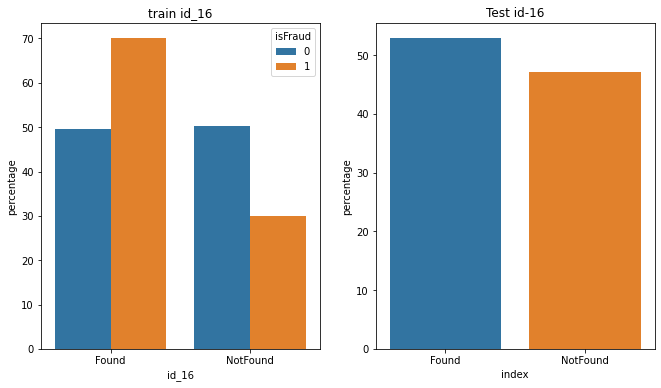

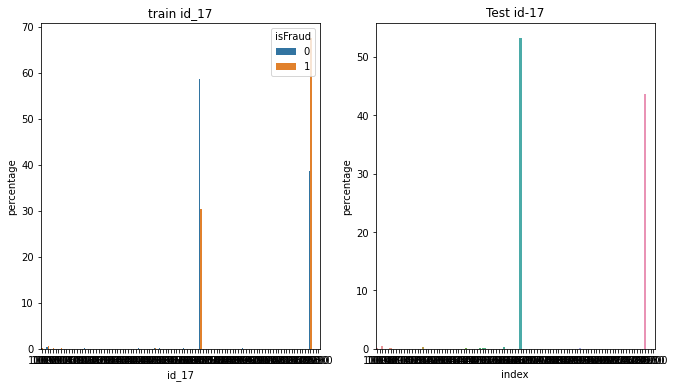

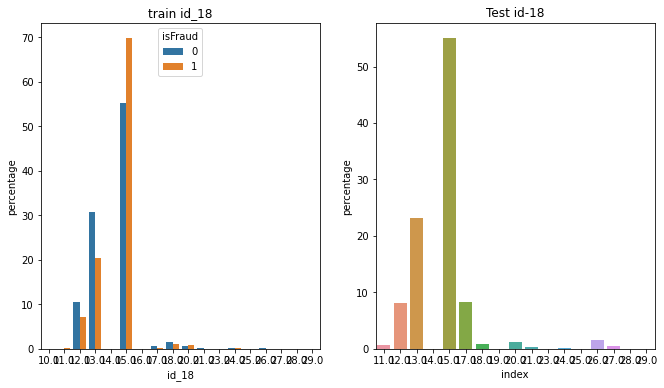

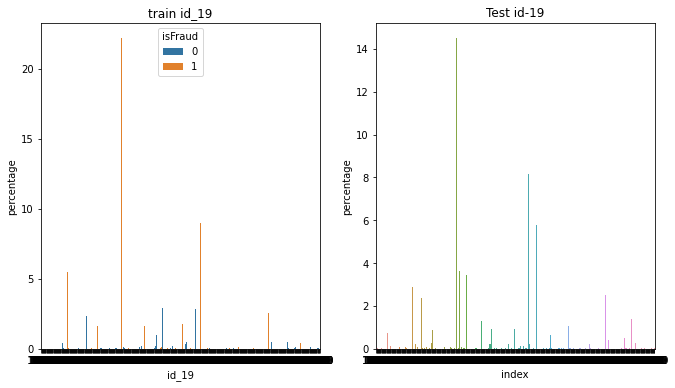

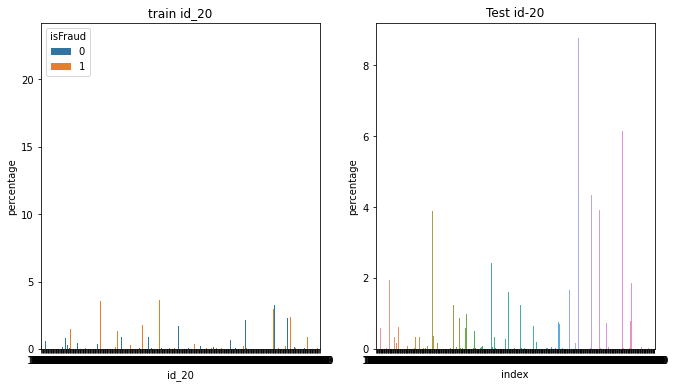

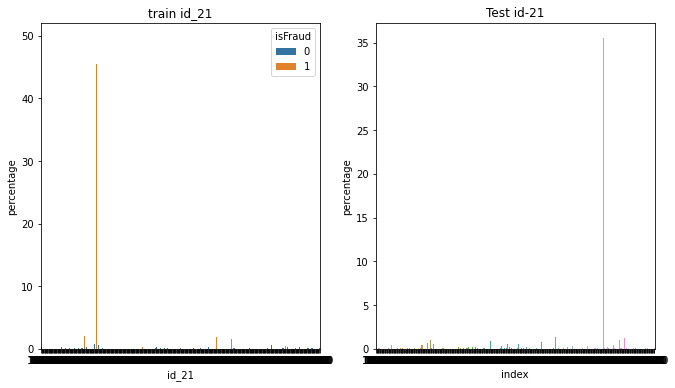

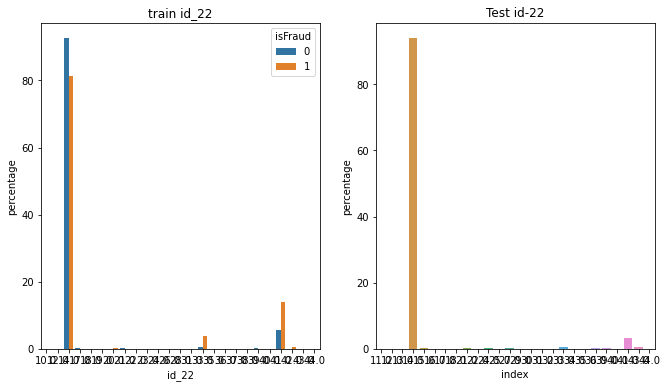

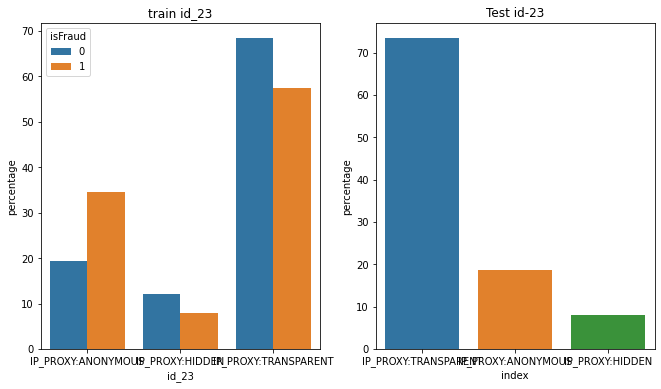

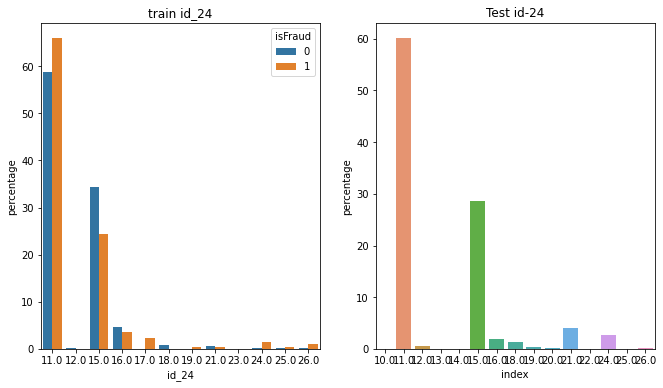

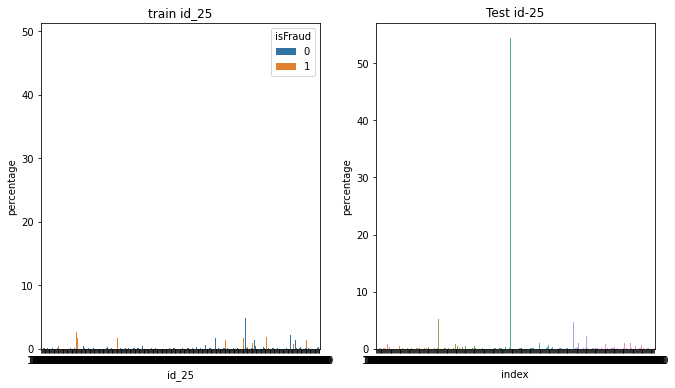

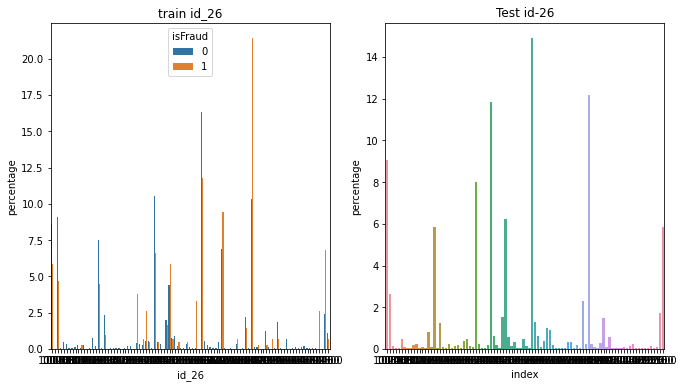

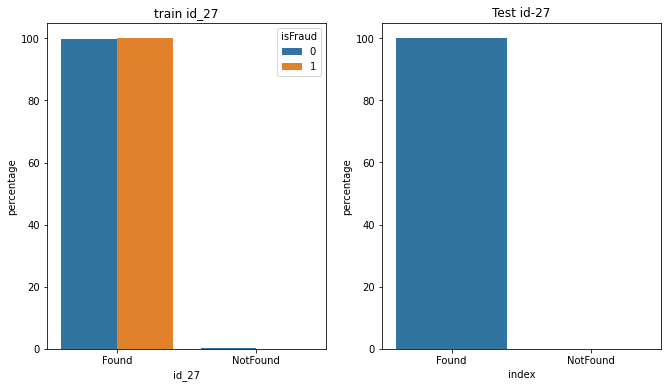

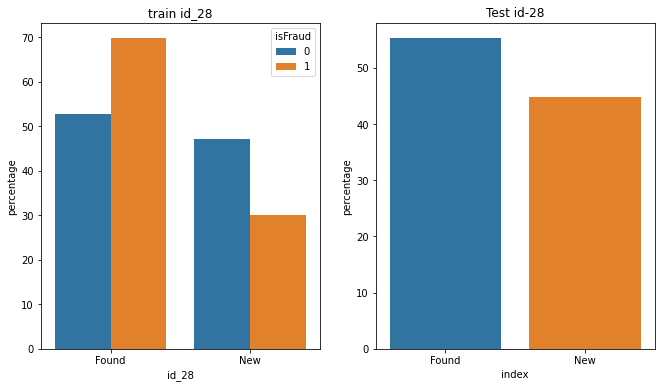

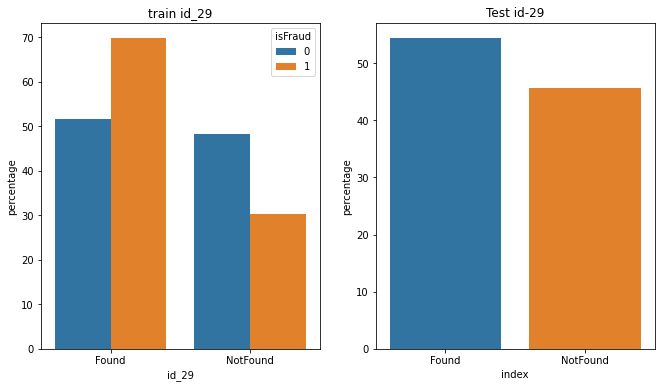

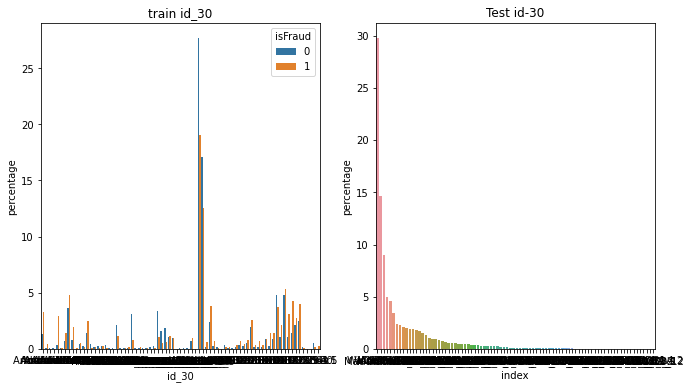

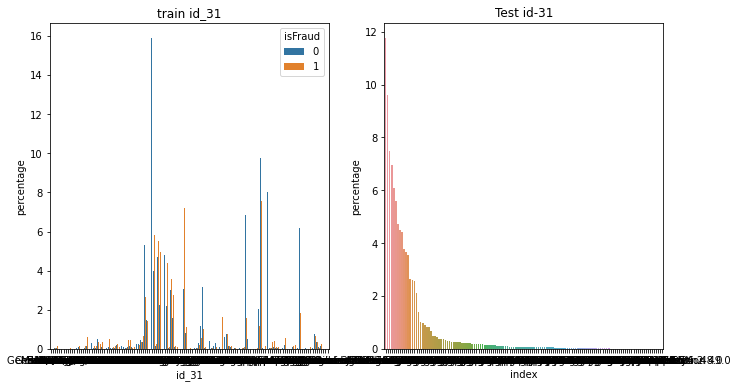

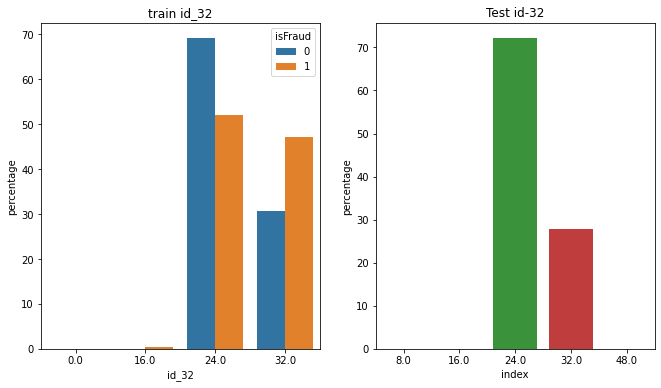

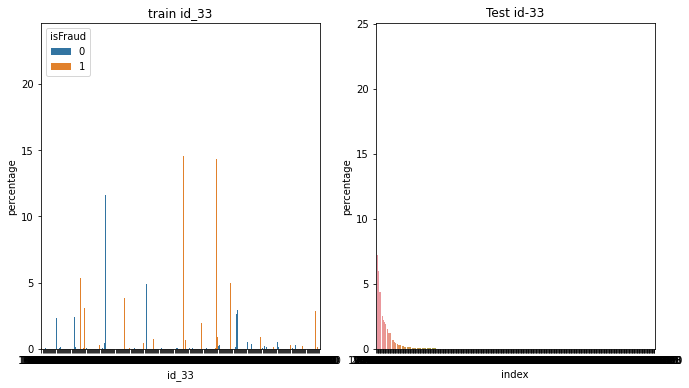

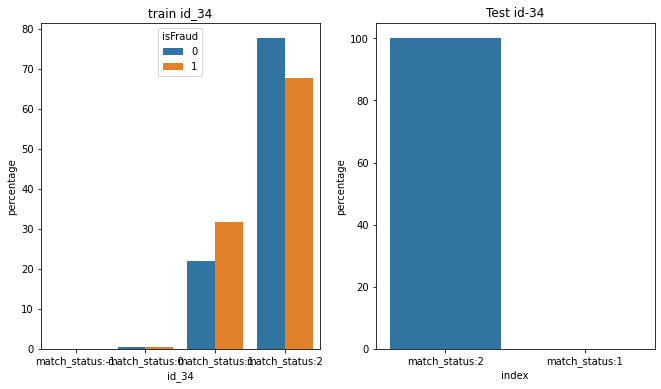

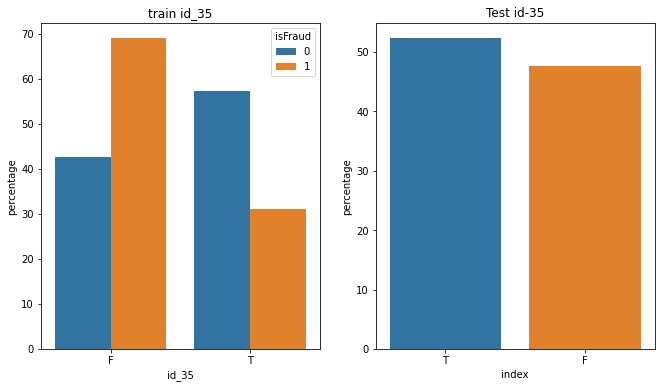

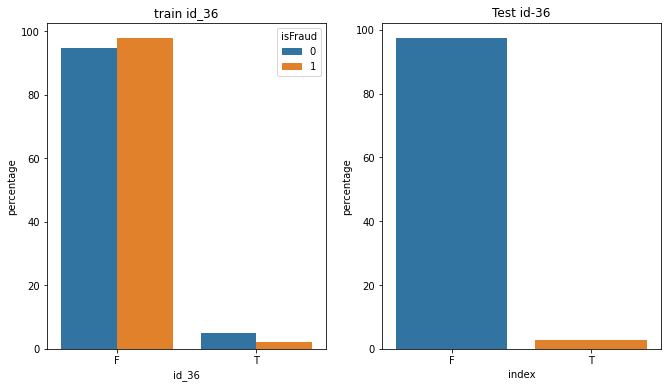

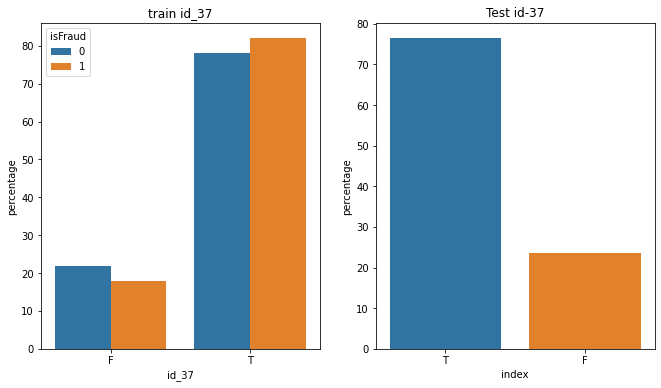

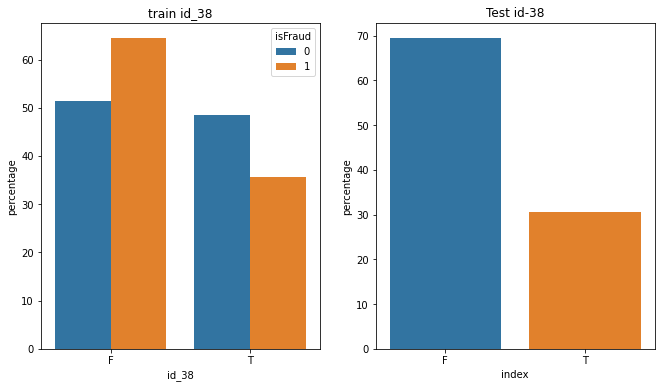

In [102]:
for i in range(12,39):
    plt.figure(figsize=(11,6))
    plt.subplot(1,2,1)
    temp = data.groupby(['isFraud'])['id_'+str(i)].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('id_'+str(i))
    sns.barplot(x="id_"+str(i), y="percentage", hue="isFraud", data=temp)
    plt.title('train id_'+str(i))
    plt.subplot(1,2,2)
    temp_test =test_data['id-'+str(i)].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    sns.barplot(x="index", y="percentage", data=temp_test)
    plt.title('Test id-'+str(i))
    plt.show()
    print("="*100)

Some of the id_x features are useful to separate legit transactions from graud trransactions but some are useless features.

Id-27 is not useful.

## **Conclusions from EDA :**



*   some id_x features are very useless so we have to remove those features.
*   M1 feature is useless because it contain values that belong to only one class.


*   since Dx features are some time reference, so it should not contain -ve value, thats why removed all the poins that contain -ve values for Dx.
*   Creating the device_name from deviceInfo feature is useful because it has property to seperate fraud transactions from Legit transactions.


*   Creating some frequency encoding feature would be useful for classification.
*   Distribution of some C features are very similar in nature.







In [111]:
# save the analysed dataset into google drive.
data.to_csv("/content/drive/My Drive/train_FD.csv", index=False)
test_data.to_csv("/content/drive/My Drive/test_FD.csv", index=False)